<a href="https://colab.research.google.com/github/susamogus154/Neural-network-from-scratch/blob/main/8s50x_l02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<hr style="height: 1px;">
<i>This notebook was authored by the 8.S50x Course Team, Copyright 2022 MIT All Rights Reserved.</i>
<hr style="height: 1px;">
<br>

<h1>Lesson 2: Binomial, Poisson, and Gaussian Distributions</h1>


<a name='section_2_0'></a>
<hr style="height: 1px;">


## <h2 style="border:1px; border-style:solid; padding: 0.25em; color: #FFFFFF; background-color: #90409C">L2.0 Overview</h2>


<h3>Navigation</h3>

<table style="width:100%">
    <tr>
        <td style="text-align: left; vertical-align: top; font-size: 10pt;"><a href="#section_2_1">L2.1 Introduction to Binomial Distribution</a></td>
        <td style="text-align: left; vertical-align: top; font-size: 10pt;"><a href="#exercises_2_1">L2.1 Exercises</a></td>
    </tr>
    <tr>
        <td style="text-align: left; vertical-align: top; font-size: 10pt;"><a href="#section_2_2">L2.2 Applications Using the Binomial Distribution</a></td>
        <td style="text-align: left; vertical-align: top; font-size: 10pt;"><a href="#exercises_2_2">L2.2 Exercises</a></td>
    </tr>
    <tr>
        <td style="text-align: left; vertical-align: top; font-size: 10pt;"><a href="#section_2_3">L2.3 The Poisson Distribution</a></td>
        <td style="text-align: left; vertical-align: top; font-size: 10pt;"><a href="#exercises_2_3">L2.3 Exercises</a></td>
    </tr>
    <tr>
        <td style="text-align: left; vertical-align: top; font-size: 10pt;"><a href="#section_2_4">L2.4 Poisson Distribution Continued</a></td>
        <td style="text-align: left; vertical-align: top; font-size: 10pt;"><a href="#exercises_2_4">L2.4 Exercises</a></td>
    </tr>
    <tr>
        <td style="text-align: left; vertical-align: top; font-size: 10pt;"><a href="#section_2_5">L2.5 The Gaussian Distribution</a></td>
        <td style="text-align: left; vertical-align: top; font-size: 10pt;"><a href="#exercises_2_5">L2.5 Exercises</a></td>
    </tr>
    <tr>
        <td style="text-align: left; vertical-align: top; font-size: 10pt;"><a href="#section_2_6">L2.6 Uncertainties in Measurement</a></td>
        <td style="text-align: left; vertical-align: top; font-size: 10pt;"><a href="#exercises_2_6">L2.6 Exercises</a></td>
    </tr>
    <tr>
        <td style="text-align: left; vertical-align: top; font-size: 10pt;"><a href="#section_2_7">L2.7 Propagating Uncertainties</a></td>
        <td style="text-align: left; vertical-align: top; font-size: 10pt;"><a href="#exercises_2_7">L2.7 Exercises</a></td>
    </tr>
</table>



<h3>Learning Objectives</h3>

By the end of this Lesson, you should be able to do the following:

- Understand how and when to use Binomial, Poisson, and Gaussian distributions.
- Understand how uncertainties propagate in measurements

<h3>Importing Data (Colab Only)</h3>

If you are in a Google Colab environment, run the cell below to import the data for this notebook. Otherwise, if you have downloaded the course repository, you do not have to run the cell below.

See the source and attribution information below:

>data: data/L02/tmpdata.txt, data/L02/tmpmc.txt<br>
>source:  https://arxiv.org/pdf/1104.0699.pdf<br>
>attribution: CDF Collaboration, arXiv:1104.0699v2<br>
>license type: https://arxiv.org/licenses/nonexclusive-distrib/1.0/license.html

In [ ]:
#>>>RUN L2.0-runcell00

#Importing data:

!git init
!git remote add -f origin https://github.com/mitx-8s50/nb_LEARNER/
!git config core.sparseCheckout true
!echo 'data/L02' >> .git/info/sparse-checkout
!git pull origin main

hint: Using 'master' as the name for the initial branch. This default branch name
hint: is subject to change. To configure the initial branch name to use in all
hint: of your new repositories, which will suppress this warning, call:
hint: 
hint: 	git config --global init.defaultBranch <name>
hint: 
hint: Names commonly chosen instead of 'master' are 'main', 'trunk' and
hint: 'development'. The just-created branch can be renamed via this command:
hint: 
hint: 	git branch -m <name>
Initialized empty Git repository in /content/.git/
Updating origin
remote: Enumerating objects: 742, done.
remote: Counting objects: 100% (144/144), done.
remote: Compressing objects: 100% (83/83), done.
remote: Total 742 (delta 67), reused 61 (delta 61), pack-reused 598 (from 2)
Receiving objects: 100% (742/742), 37.38 MiB | 12.67 MiB/s, done.
Resolving deltas: 100% (351/351), done.
From https://github.com/mitx-8s50/nb_LEARNER
 * [new branch]      Alex       -> origin/Alex
 * [new branch]      main       -> o

<h3>Importing Libraries</h3>

Before beginning, run the cell below to import the relevant libraries for this notebook.


In [ ]:
#>>>RUN: L2.0-runcell01

# The documentation to these packages is linked beside them if you have questions

import numpy as np                 #https://numpy.org/doc/stable/
from scipy.special import comb     #https://docs.scipy.org/doc/scipy/reference/special.html
import scipy.stats as stats        #https://docs.scipy.org/doc/scipy/reference/stats.html
import matplotlib.pyplot as plt    #https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html

<h3>Setting Default Figure Parameters</h3>

The following code cell sets default values for figure parameters.

In [ ]:
#>>>RUN: L2.0-runcell02

#set plot resolution
%config InlineBackend.figure_format = 'retina'

#set default figure parameters
plt.rcParams['figure.figsize'] = (9,6)

medium_size = 12
large_size = 15

plt.rc('font', size=medium_size)          # default text sizes
plt.rc('xtick', labelsize=medium_size)    # xtick labels
plt.rc('ytick', labelsize=medium_size)    # ytick labels
plt.rc('legend', fontsize=medium_size)    # legend
plt.rc('axes', titlesize=large_size)      # axes title
plt.rc('axes', labelsize=large_size)      # x and y labels
plt.rc('figure', titlesize=large_size)    # figure title

<a name='section_2_1'></a>
<hr style="height: 1px;">

## <h2 style="border:1px; border-style:solid; padding: 0.25em; color: #FFFFFF; background-color: #90409C">L2.1 Introduction to Binomial Distribution</h2>  

| [Top](#section_2_0) | [Previous Section](#section_2_0) | [Exercises](#exercises_2_1) | [Next Section](#section_2_2) |


*The material in this section is discussed in the video **<a href="https://courses.mitxonline.mit.edu/learn/course/course-v1:MITxT+8.S50.1x+3T2024/block-v1:MITxT+8.S50.1x+3T2024+type@sequential+block@seq_LS2/block-v1:MITxT+8.S50.1x+3T2024+type@vertical+block@vert_LS2_vid1" target="_blank">HERE</a>.** You are encouraged to watch that video and use this notebook concurrently.*

<h3>Slides</h3>

Run the code below to view the slides for this lesson, which are discussed in the videos. You can also open the slides in a separate window <a href="https://mitx-8s50.github.io/slides/L02/slides1.html" target="_blank">HERE</a>.

In [ ]:
#>>>RUN: L2.0-slides

from IPython.display import IFrame
IFrame(src='https://mitx-8s50.github.io/slides/L02/slides1.html', width=975, height=550)

<h3>Overview</h3>

<!--<img src="https://external-preview.redd.it/Kt_QUdsFmAI4v9hPw-JbYA2wC9blaF8iIvnVdla2aaE.jpg?auto=webp&s=da7915bb8a27e47d88adaf6f58bab193b7d1f35f" width="500"/>-->

Often we perform measurements having some probability. Let's say we perform many equal-probability measurements. What will be our distribution? Since this is not a math class, we will not go into the depth of the math behind this, but let's at least walk through a basic derivation.



Let's say you flip a coin 10 times, and the probability of heads is $p$. Let's say you get heads 3 times and tails 7 times.

* What are the number of different cases where there are 3 heads?

In this case, all we care about is the number of heads out of the total number of flips, so we can use the formula for a *combination*: $_{10}C_{3}=\frac{10!}{3!(10-3)!}=120$ (<a href="https://en.wikipedia.org/wiki/Combination" target="_blank">details</a>). As a brief reminder of how this works, there is a total of $10!$ different ordered combinations of our distinct flips 1 through 10. Let's say we identify 3 of those 10 flips as special for whatever reason (e.g. let's take the first 3 flips). Then there are $3!$ ways to order those flips (e.g. (1,2,3),(1,3,2),....) and there are $7!$ ways to order the remaining 7 flips. To find the *distinct* number of ways a group of 3 and a group of 7 can happen, we divide the total number of different ordered combinations $10!$ by these two groups. Thus, for all 10 flips, there are $_{10}C_{3}$ different ways to order a group of 3 flips and a group of 7 flips, where the group of 3 and the group of 7 are *distinct* from one another (one example being 1,2,3 is heads and 4...10 is tails). More generally, for $n$ total flips and $m$ heads/tails, the total number of distinct combinations is written as $\frac{n!}{m!(n-m)!}$.


* What is the probability of the scenario where we get 3 heads out of 10 total flips?

 * Each flip of the coin has equal probability of landing on heads. Let's say that this probability is $p$. With one heads and one tails in two flips, the probability would be the probability to get heads ($p$) multiplied by the probability to get tails ($1-p$), multiplied by the number of distinct combinations that would give you one head and one tail. In this case, the number of combinations is $2$ (heads first and tails second, *or* tails first and heads second). This yields a total probability of $p(1-p)\times N_\mathrm{combo}=2p(1-p)$.

 * In the case of 10 flips where there are 3 heads, the probability becomes the probability of 3 heads $p^{3}$ multiplied by the probability of 7 tails $(1-p)^{7}$ multiplied by $N_\mathrm{combo}$. In general, for $n$ flips and $m$ heads, we have $p^{m}(1-p)^{n}\times N_\mathrm{combo}$.



* What is the distribution?
 * If we combine everything for our specific case, we have $_{10}C_{3}\times p^3(1-p)^7$
 * The general formula is actually called the binomial distribution! It is given by $f(m)=p^{m}(1-p)^{n}\frac{n!}{m!(n-m)!}$

Let's actually compute this for a few cases!



In [ ]:
#>>>RUN: L2.1-runcell01

import numpy as np
from scipy.special import comb
print("Test comb:",comb(2,1),"True: 2",comb(3,2),"True: 3",comb(10,3),"True: 120")

#for p=0.5, what is the probability of 3 heads out of 10 draws?
def prob(p=0.5,nheads=3,ntotal=10):
    pheads=np.power(p,nheads)
    ptails=np.power(1-p,ntotal-nheads)
    combos=comb(ntotal,nheads)
    return combos*ptails*pheads

print("Probability of 3 heads in 10 draws is:",prob(nheads=3,ntotal=10))

Test comb: 2.0 True: 2 3.0 True: 3 120.0 True: 120
Probability of 3 heads in 10 draws is: 0.1171875


Out of all of this math, we have derived the binomial distribution. This is the first empirical distribution we will need for this Lesson. In fact, all of the other distributions we will study are built upon the binomial distribution. Let's compute the expectation and variance of this distribution. First, we can define the distribution:

$$
\begin{equation}
f(p,n,m) = \frac{n!}{m!(n-m)!}p^{m}(1-p)^{n-m}\\
\end{equation}
$$

Now, let's compute the expectation over $m$ for $p$ and $n$ fixed, defined as $E[m;p,n]$ the semicolon denotes fixed.

$$
\begin{equation}
E[m;p,n]=\int_0^{n} p^{m}(1-p)^{n}\frac{n!}{m!(n-m)!} \mathrm{heads}(m) dm \\
\end{equation}
$$

where $\mathrm{heads}(m)$ is a function that we define as the expected value given a heads or tails observation. In this case, we will define this function as $1$ for heads and $0$ for tails. This is a complicated form, but in the case of just getting one head out of one flip, we have:


$$
\begin{equation}
E[m;p,n=1]= p\times1+(1-p)\times0\\
E[m;p,n=1]= p
\end{equation}
$$

Now let's introduce a new function that is defined as the sum of $n$ individual experiments, we can define the function $f(x)=\sum_{i} \rm{heads}(x_{i})$. The expectation for this is

$$
\begin{eqnarray}
E[f(x)]&=&\sum_{0}^{n} p\times 1+(1-p)\times 0 \\
E[f(x)]&=&np\\
\end{eqnarray}
$$

That means that the average value over $n$ tries $\bar{x}=f(x)/n$, or rather simply the value $p$.

In a similar way, we can define the variance as:

$$
\begin{eqnarray}
V[f(x)]&=&\sum_{i=0}^{n} (x-\mu)^2 \\
V[f(x)]&=&\sum_{i=0}^{n} p\times(1-\mu)^2 + (1-p) \times (0-\mu)^2 \\
V[f(x)]&=&\sum_{i=0}^{n} p \times (1-p)^2 + (1-p) \times (0-p)^2 \\
V[f(x)]&=&\sum_{i=0}^{n} (1-p)\times (p^2 +p(1-p))  \\
V[f(x)]&=&\sum_{i=0}^{n} (1-p)\times p   \\
V[f(x)]&=&np(1-p)
\end{eqnarray}
$$

or in other words, if we consider performing $n$ independent measurements, the variance over this distribution becomes $V[f(x)/n]=V[f(x)]/n=p(1-p)$.

<h3>A Computational Example</h3>

It's all fun to do math, but the point of this class is to do it with computers, so let's do the same derivations numerically. Note that we plot these as discrete lines rather than continuous points, since the binomial distribution is discrete and only defined for discrete numbers (integers in this case).


norm: 0.9999999999999992 expectation: 7.500000000000001 Var: 5.624999999999997
norm: 1.000000, expectation: 7.5 Var: 5.625


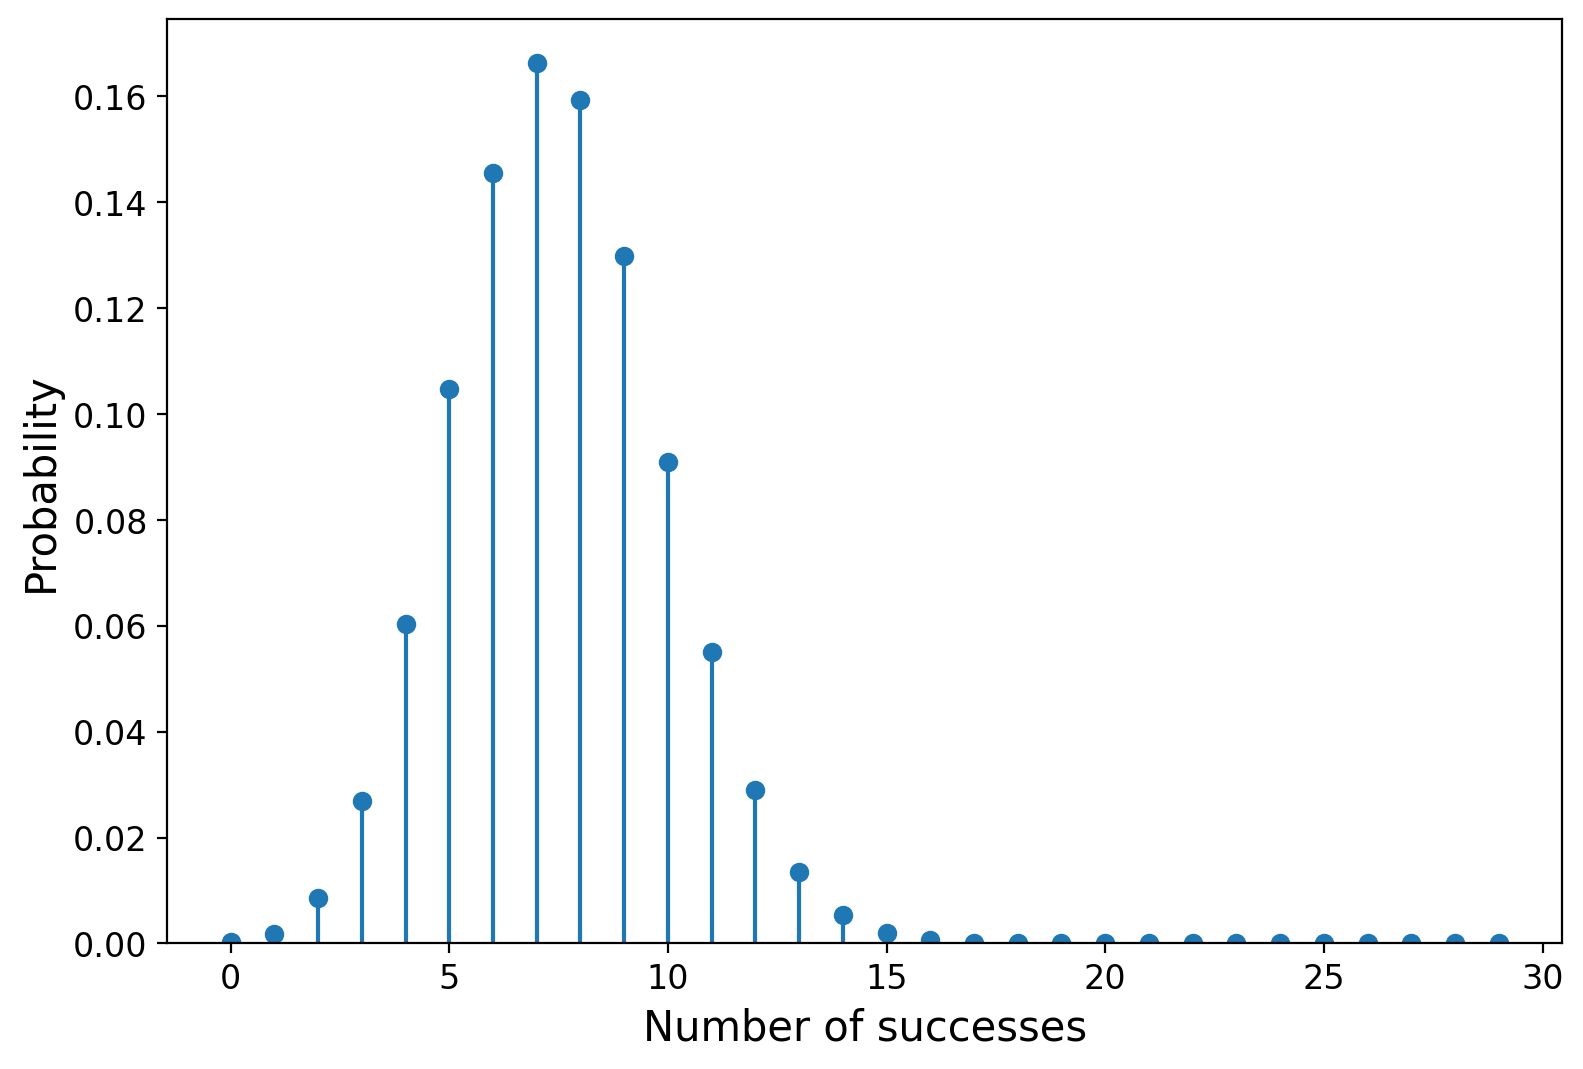

In [ ]:
#>>>RUN: L2.1-runcell02

#We are going to use scipy stats package
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
n=30
p=0.25

#Scipy has a binomial, but since this is a discrete distribution we use pmf (probability mass function) rather than pdf
k=np.arange(0,n)
binomial=stats.binom.pmf(k,n,p)

#let's get the integral of this guy
norm=0
exp=0
var=0
for i0 in range(n):
    norm+=stats.binom.pmf(i0,n,p)
    exp+=i0*stats.binom.pmf(i0,n,p)
for i0 in range(n):
    pVal=stats.binom.pmf(i0,n,p)
    var+=(i0-exp/norm)*(i0-exp/norm)*pVal

#Print it out
print("norm:",norm,"expectation:",exp/norm,"Var:",var/norm)

#Now let's check with the expectation
print("norm: 1.000000, expectation:",n*p,"Var:",n*p*(1-p))

plt.plot(k,binomial,'o')
plt.vlines(k,0, binomial)
plt.ylim(bottom=0)

plt.xlabel("Number of successes")
plt.ylabel("Probability")
plt.show()

<a name='exercises_2_1'></a>     

| [Top](#section_2_0) | [Restart Section](#section_2_1) | [Next Section](#section_2_2) |


### <span style="border:3px; border-style:solid; padding: 0.15em; border-color: #90409C; color: #90409C;">Ex-2.1.1: Probability as a Function of Coin Fairness</span>

In order to answer this question, plot the probability of flipping a coin 10 times and observing 3 heads, for varying "coin fairness." In other words, as a function of probability $p$ (i.e., the probability $p$ of getting a heads is varying).


<u>Hint:</u> Use the previously defined function `prob(p=0.5,nheads=3,ntotal=10)` and vary `p`, or use the built-in function `stats.binom.pmf(k,n,p)`, defined <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.binom.html" target="_blank">here</a>.


As the probability $p$ varies from 0 to 1, which of the following correctly describes the behavior? The probability of observing 3 head out of 10 flips...

- keeps increasing to a value of 1 when p=1
- keeps decreasing to a value of 0 when p=1
- increases from 0 at p=0 to a maximum value, then decreases to 0 at p=1
- maintains a constant value for all p

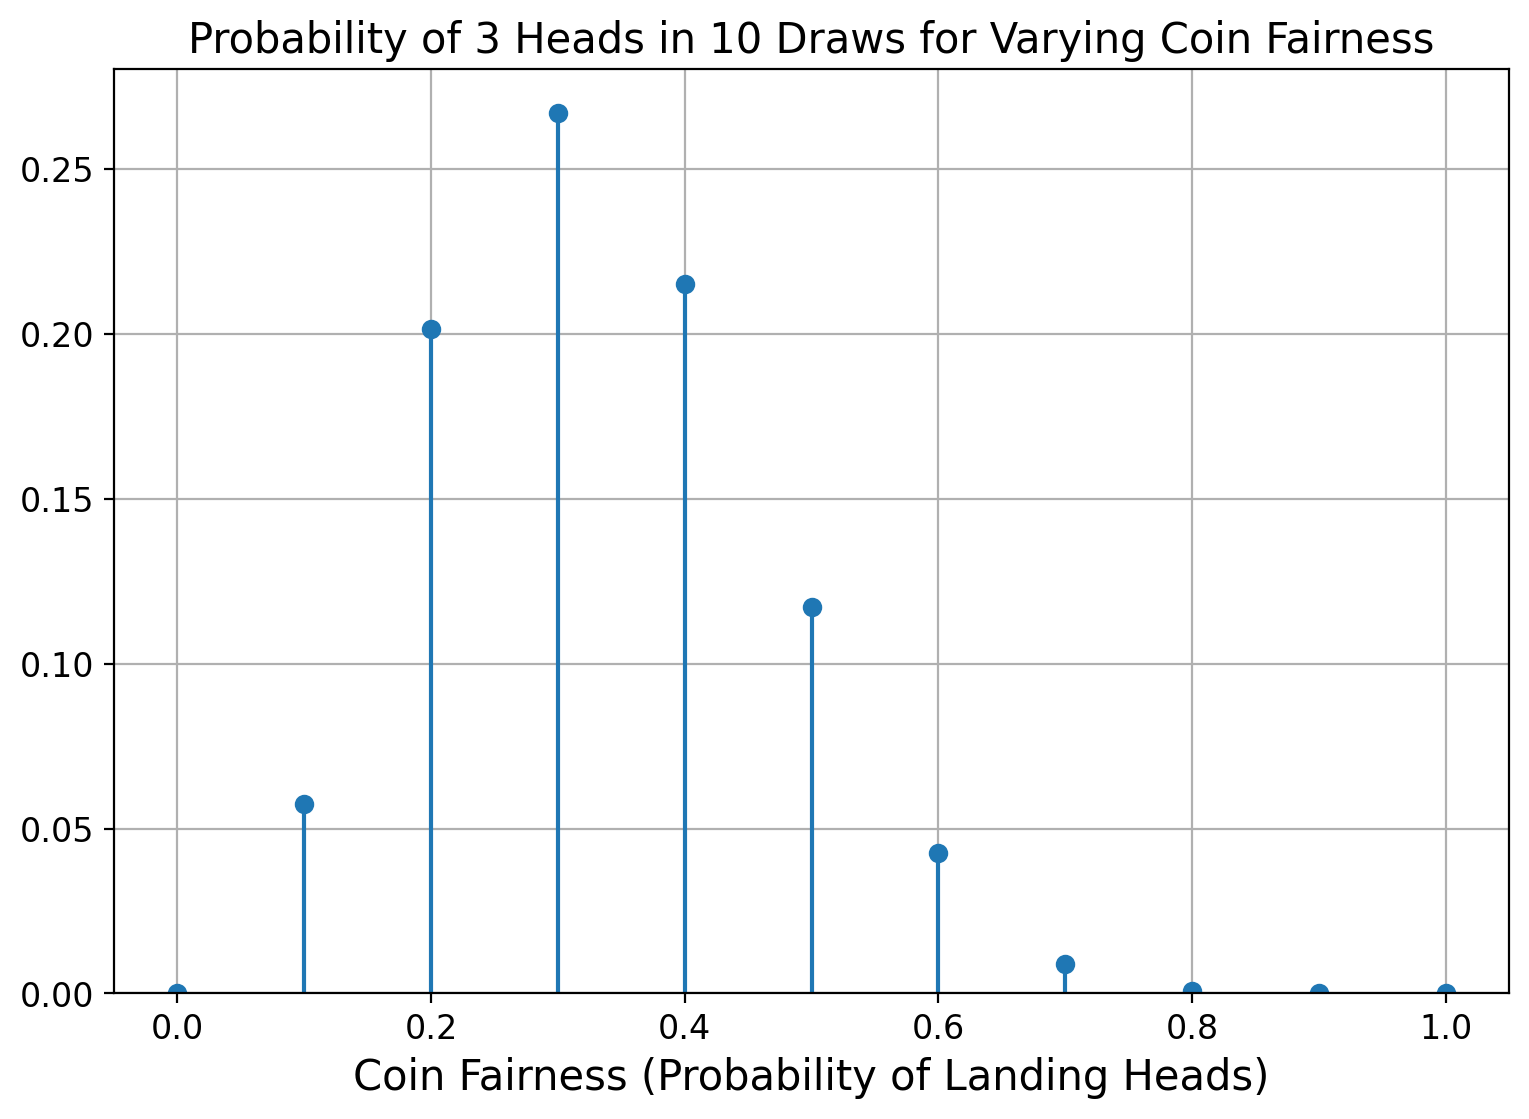

The probability of 3 heads in 10 draws is zero for p=0, increases to a maximum around p=0.3, then decreases to 0 as p approaches 1.0.


In [ ]:
#>>>EXERCISE: L2.1.1
# Use this cell for drafting your solution (if desired)

import numpy as np
import matplotlib.pyplot as plt
from scipy.special import comb

#for p=0.5, what is the probability of 3 heads out of 10 draws?
def prob(p=0.5,nheads=3,ntotal=10):
    #YOUR CODE HERE
    return comb(ntotal, nheads) * np.power(p, nheads) * np.power(1-p, ntotal-nheads)


def plot_prob(x):
    #plotting-------------------
    #plot data
    ydata = prob(p=x,nheads=3,ntotal=10)
    plt.plot(x, ydata, 'o')
    plt.vlines(x,0, ydata)
    plt.ylim(bottom=0)

    #plot labels and style
    plt.title('Probability of 3 Heads in 10 Draws for Varying Coin Fairness', fontsize=15)
    #plt.legend(loc='lower right', fontsize = 12)
    plt.xlabel('Coin Fairness (Probability of Landing Heads)', fontsize=15) #Label x

    # changing the fontsize of ticks
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

    # a grid
    plt.grid()
    plt.show()


prob_vals = np.linspace(0,1,11)
plot_prob(prob_vals)

print("The probability of 3 heads in 10 draws is zero for p=0, increases to a maximum around p=0.3, then decreases to 0 as p approaches 1.0.")

### <span style="border:3px; border-style:solid; padding: 0.15em; border-color: #90409C; color: #90409C;">Ex-2.1.2: Rolling a Die</span>

Now, instead of flipping a coin, consider rolling a die 10 times. If the die lands on 6, we consider the trial a success. If the die lands on anything other than 6, we consider the trial a failure. Using the formulae for expectation and variance that we previously defined, calculate the expectation and variance of the binomial distribution related to these criteria.

Enter your answer as a list of numbers with precision 1e-2: `[expectation, variance]`

p = 1/6

E[f(x)] = np = [0.17, 0.33, 0.50, 0.67, 0.83, 1.0, 1.1666666666666667, 1.3333333333333333, 1.5, 1.6666666666666667]

V[f(x)] = np(1-p) = [0.13888888888888887, 0.27777777777777773, 0.4166666666666667, 0.5555555555555555, 0.6944444444444445, 0.8333333333333334, 0.9722222222222223, 1.111111111111111, 1.25, 1.388888888888889]

>#### Follow-up 2.1.2a (ungraded)
>    
>Plot the binomial distribution of these trials, and calculate the norm (which should be 1), expectation, and variance. Use the starting code below.

norm: 0.9999999834618286 expectation: 1.6666665288485671 , Var: 1.3888877633743897
norm: 1.000000, expectation: 1.6666666666666665 , Var: 1.3888888888888888


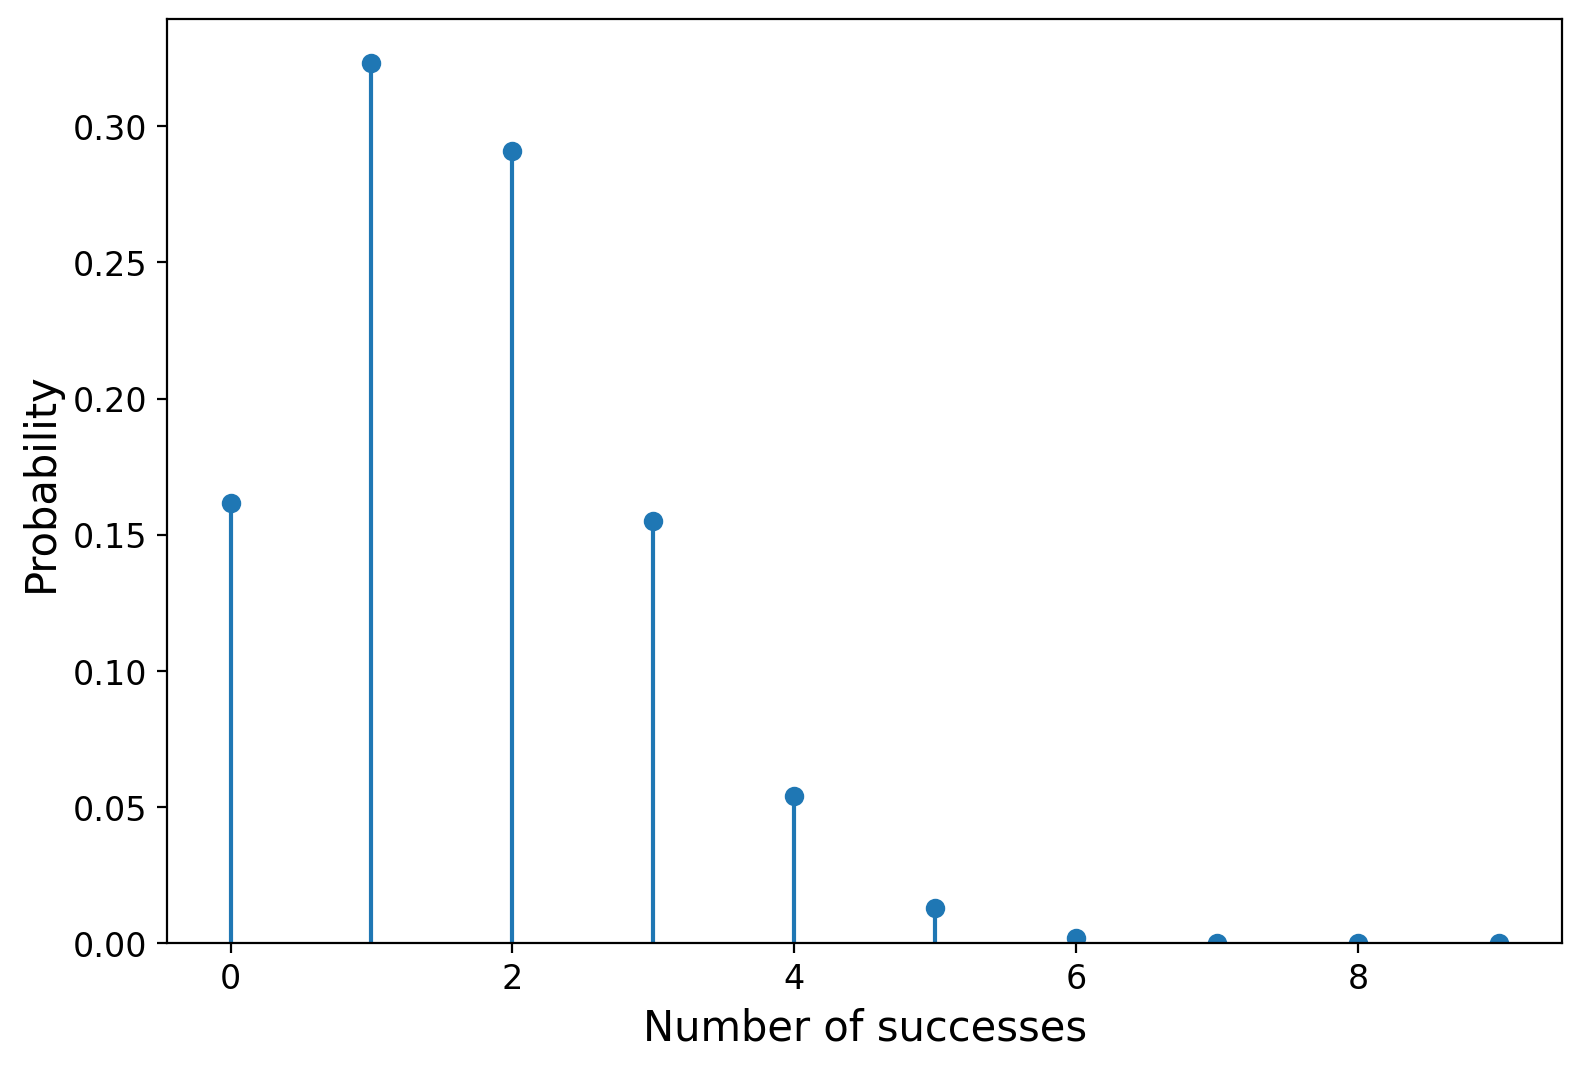

In [ ]:
#>>>FOLLOW-UP: L2.1.2a
# Use this cell for drafting your solution (if desired)

#Follow example given in L2.1
import scipy.stats as stats
import matplotlib.pyplot as plt

n=10
p=1/6

#use pmf rather than pdf
k=np.arange(0,n)
binomial=stats.binom.pmf(k,n,p)


def get_binom_integral(n,p):
    #get the integral
    ##########
    norm = 0
    exp = 0
    for i in range(n):
      norm += p**i * (1-p)**(n-i) * comb(n, i)
      exp += p**i * (1-p)**(n-i) * comb(n, i) * i
    #YOUR CODE HERE
    ##########
    var = 0
    for i in range(n):
      pVal = p**i * (1-p)**(n-i) * comb(n, i)
      var += pVal * (i-exp)**2
    return norm, exp, pVal, var

norm, exp, pVal, var = get_binom_integral(n,p)

#print
print("norm:",norm,"expectation:",exp/norm,", Var:",var/norm)

#check
print("norm: 1.000000, expectation:",n*p,", Var:",n*p*(1-p))


plt.plot(k,binomial,'o')
plt.vlines(k,0, binomial)
plt.ylim(bottom=0)

plt.xlabel("Number of successes")
plt.ylabel("Probability")
plt.show()

<a name='section_2_2'></a>
<hr style="height: 1px;">

## <h2 style="border:1px; border-style:solid; padding: 0.25em; color: #FFFFFF; background-color: #90409C">L2.2 Applications Using the Binomial Distribution</h2>  

| [Top](#section_2_0) | [Previous Section](#section_2_1) | [Exercises](#exercises_2_2) | [Next Section](#section_2_3) |


*The material in this section is discussed in the video **<a href="https://courses.mitxonline.mit.edu/learn/course/course-v1:MITxT+8.S50.1x+3T2024/block-v1:MITxT+8.S50.1x+3T2024+type@sequential+block@seq_LS2/block-v1:MITxT+8.S50.1x+3T2024+type@vertical+block@vert_LS2_vid2" target="_blank">HERE</a>.** You are encouraged to watch that video and use this notebook concurrently.*

<h3>Overview</h3>

Now, let's do some problems that are more difficult than flipping a coin. Also, let's think about this in a real life setting. Let's say that you are observing <a href="https://en.wikipedia.org/wiki/Fast_radio_burst" target="_blank">fast radio bursts</a> and, based on the Wikipedia page <a href="https://en.wikipedia.org/wiki/List_of_fast_radio_bursts" target="_blank">here</a>, you observe about 19 fast radio bursts per year. What is the probability that you observe 2 fast radio bursts (FRB) within a day of each other?

The trick to this problem is think of each day as flipping a coin, where the probability of heads is instead the probability of finding a FRB. We can caculate the average probability by noting that over a period 365 days (i.e. 365 experiments), we see 19 FRBs, or in other words:

$$
\begin{eqnarray}
E[f(x;n=365)]&=&np \\
             &=&19 \\
             &=&365\times p \\
            p&=&\frac{19}{365}
\end{eqnarray}
$$


Thus, the probability of $2$ in a row turns out to be 0.3% (see below). Moreover, the probability of 2 observations in 7 days is (see below) 4.3%.


In [ ]:
#>>>RUN: L2.2-runcell01

def prob(ndays=2,nobs=2,p=19/365):
    return stats.binom.pmf(nobs,ndays,p)

print("2 observations in 2 days:",prob())
print("2 observations in 7 days:",prob(7))
print("19 observations in 365 days:",prob(365,19))


2 observations in 2 days: 0.0027097016325764683
2 observations in 7 days: 0.04355689764465313
19 observations in 365 days: 0.0935904593189705


Now, let's ask an important physics question. Let's say you observed 2 FRBs back to back. Given the probability of this occurence is so low, is something significant happening in the universe? <a href="https://en.wikipedia.org/wiki/Fast_radio_burst#FRB_201124" target="_blank">Read here.</a>

Secondly, why is the probability of 19 observations in 365 days so low? (only 10%). To understand this let's make a plot.


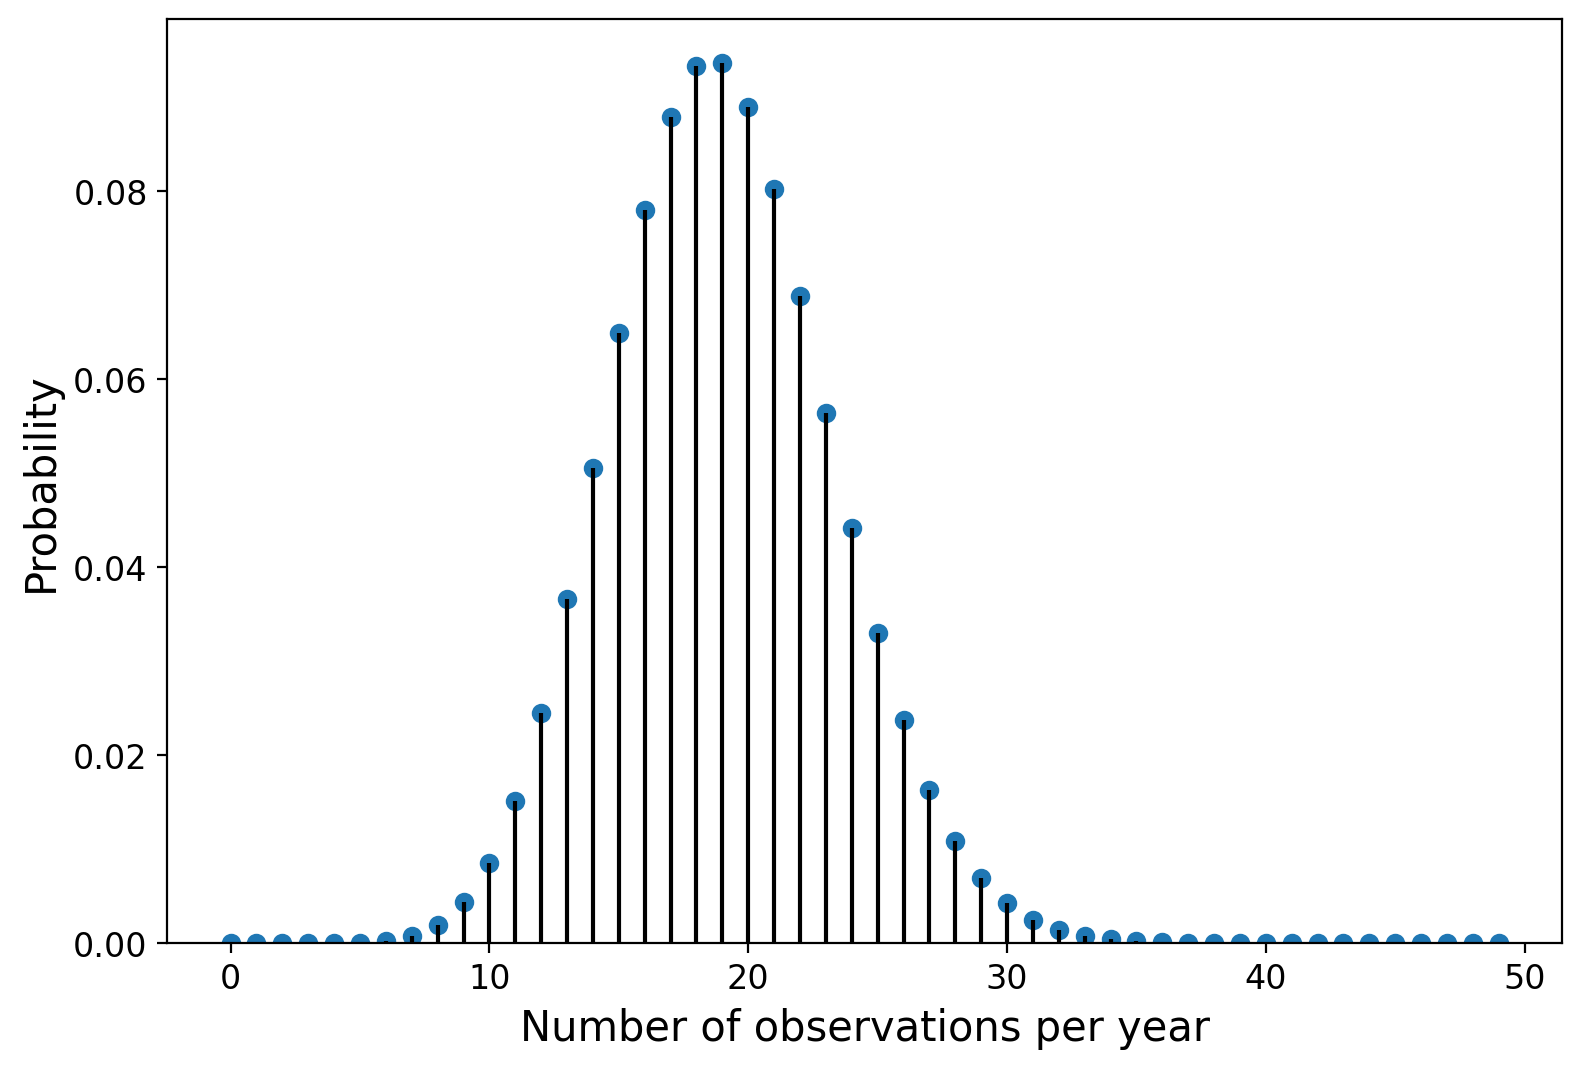

In [ ]:
#>>>RUN: L2.2-runcell02

p=19/365
n=365
k=np.arange(0,50)
binomial=stats.binom.pmf(k,n,p)

def plotBinomial(iX,iBinomial,label='Binomial',color='black'):
    plt.plot(iX,iBinomial,'o')
    plt.vlines(iX,0, iBinomial,label=label,color=color)
    plt.ylim(bottom=0)
    plt.xlabel("Number of observations per year")
    plt.ylabel("Probability")

plotBinomial(k,binomial)


Getting exactly 19 observations is unlikely because there is variation. What we really want to do is integrate the number of observations that are either less than or equal to 19. This is the cumulative distribution function.

$$
\begin{equation}
\mathrm{CDF}(\mathrm{binomial}(x)) = \int_{-\infty}^{x} \mathrm{binomial}(u;p,k) du
\end{equation}
$$

The nice thing is that this is all built into our statistics code. Let's plot it!


cdf at 19: 0.5606290918165597


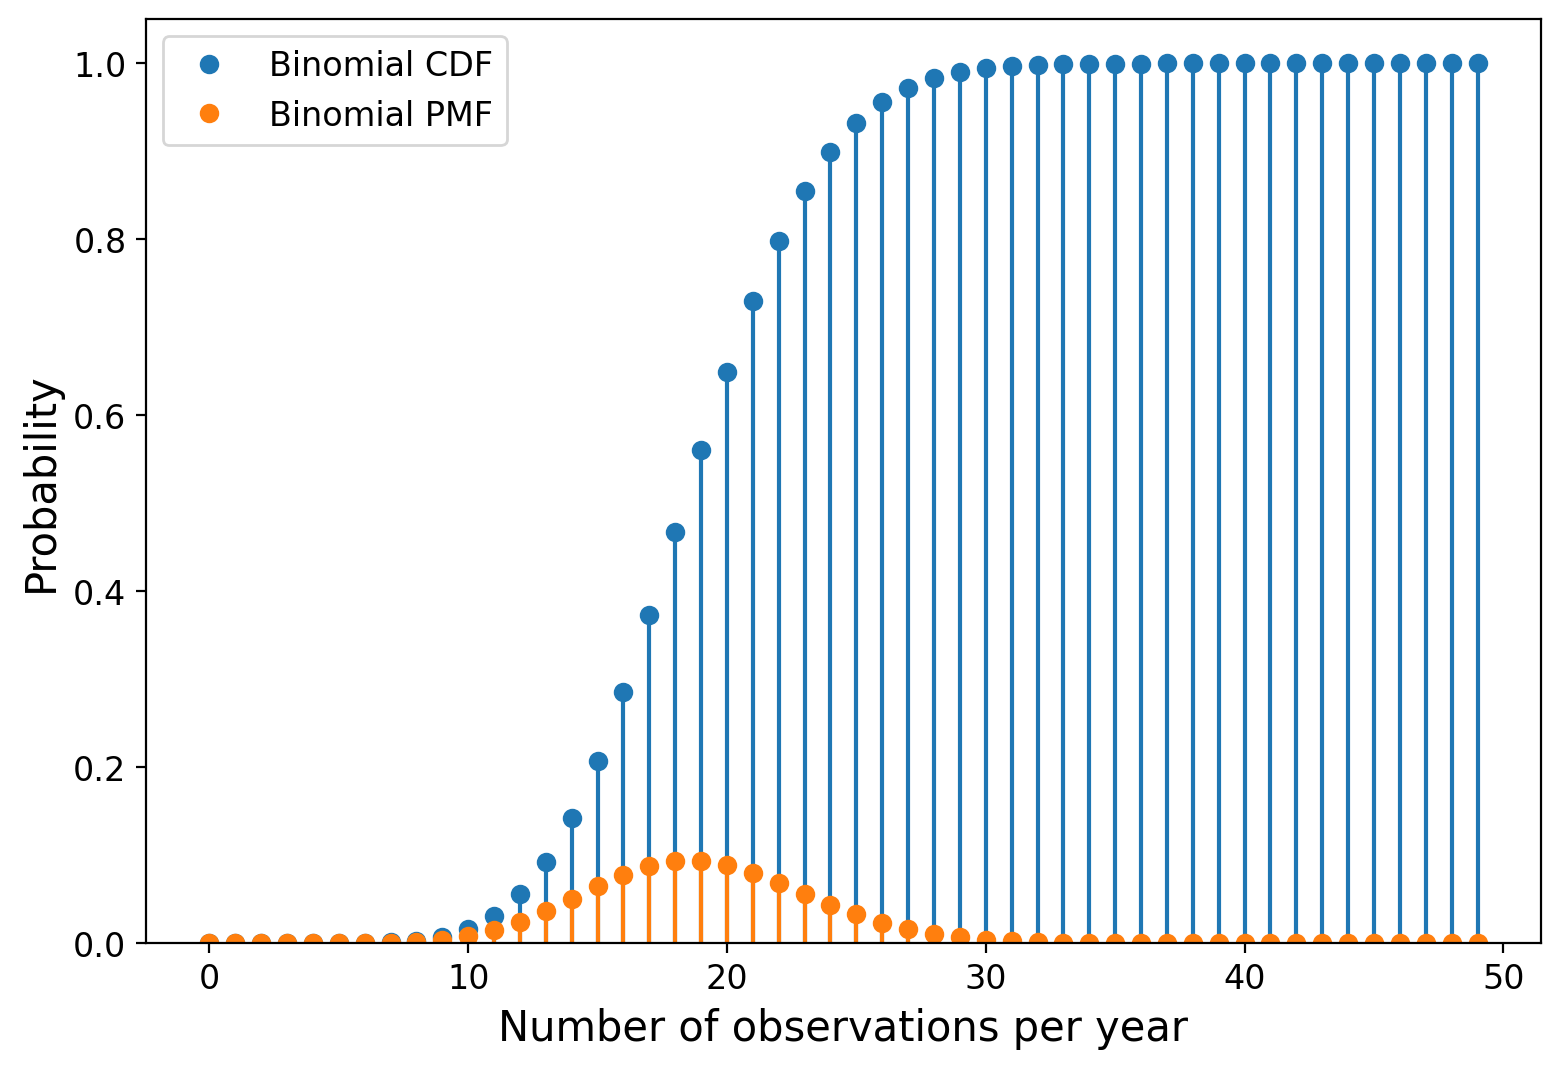

mean: 18.999999980557305 stddev: 4.243931938945086


In [ ]:
#>>>RUN: L2.2-runcell03

p=19/365
n=365
k=np.arange(0,50)
binomial=stats.binom.pmf(k,n,p)
binomialcdf=stats.binom.cdf(k,n,p)
print("cdf at 19:",stats.binom.cdf(19,n,p))

plt.plot(k,binomialcdf,'o', label="Binomial CDF")
plt.vlines(k,0, binomialcdf, color=plt.gca().lines[-1].get_color())
plt.ylim(bottom=0)

plt.plot(k,binomial,'o', label="Binomial PMF")
plt.vlines(k,0, binomial, color=plt.gca().lines[-1].get_color())
plt.ylim(bottom=0)

plt.xlabel("Number of observations per year")
plt.ylabel("Probability")
plt.legend()
plt.show()


mean = np.average(k, weights=binomial)
variance = np.average((k-mean)**2, weights=binomial)
print("mean:",mean,"stddev:",np.sqrt(variance))



So, now we see clearly that the CDF is at approximately 50% for 19 observations. It's not exactly 50% for the simple fact that this is a discrete distribution. However, the expectation will be at exactly 19.

<a name='exercises_2_2'></a>     

| [Top](#section_2_0) | [Restart Section](#section_2_2) | [Next Section](#section_2_3) |


### <span style="border:3px; border-style:solid; padding: 0.15em; border-color: #90409C; color: #90409C;">Ex-2.2.1: Rate of GW Detections</span>

Let's do another related problem. With the current rate of gravitational wave (GW) detections, we observe a GW once per week. What is the probability that on 3 or more *days* gravitational waves are detected in one week? Note here that the time interval is in days. Use the starting code below to compute your answer.

p = 1/7
f(0) = 0.34
f(1) = 0.06
f(2) = 0.01
1-f(0)-f(1)-f(2) = 0.59

>#### Follow-up 2.2.1a (ungraded)
>  
>Try plotting this distribution! Additionally, what is the probability distribution for the number of days in which GW events were observed over a whole year, and what is the mean and variance of this distribution? Use the starting code below.

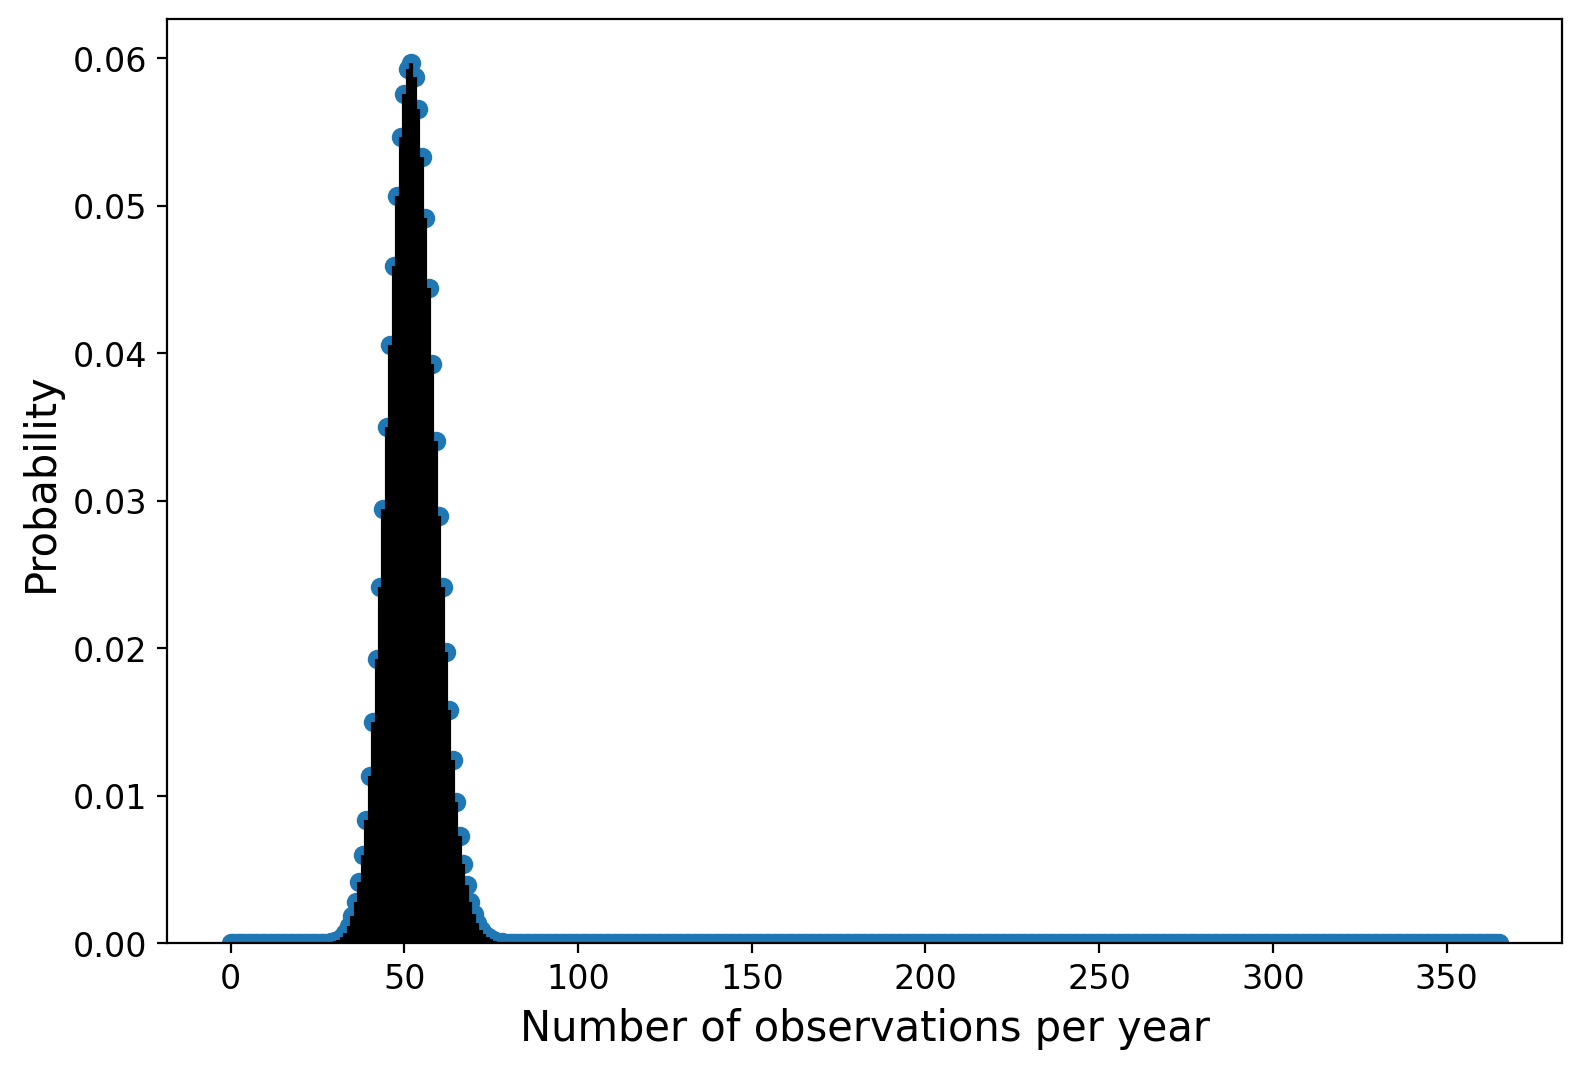

mean: 52.14285714285714 stddev: 6.685347975312908


In [ ]:
#>>>FOLLOW-UP: L2.2.1a
# Use this cell for drafting your solution (if desired)

import scipy.stats as stats

def plotBinomial(iX,iBinomial,label='Binomial',color='black'):
    plt.plot(iX,iBinomial,'o')
    plt.vlines(iX,0, iBinomial,label=label,color=color)
    plt.ylim(bottom=0)
    plt.xlabel("Number of observations per year")
    plt.ylabel("Probability")



#now what about for GWs in a year
n = 365
p = 1/7
k = range(0, 366)

binomial=stats.binom.pmf(k,n,p)

plotBinomial(k,binomial)
plt.show()

average  = np.average(k, weights=binomial)
variance = np.average((k-average)**2, weights=binomial)
print("mean:",average,"stddev:",np.sqrt(variance))



### <span style="border:3px; border-style:solid; padding: 0.15em; border-color: #90409C; color: #90409C;">Ex-2.2.2: Probability of Coin Flips</span>

What is the probability of 2 heads in 10 coin flips, given a 50% probability for heads? What about if there is a 10% probability for heads?

Enter your answer as a list of two numbers, where the numbers correspond to probabilities: `[prob with p=50%, prob with p=10%]`

Use the starting code below to aid your calculation.

In [ ]:
#>>>EXERCISE: L2.2.2
# Use this cell for drafting your solution (if desired),
# then enter your solution in the interactive problem online to be graded.

def prob(nheads=2,nflips=10,p=0.5):
  return np.power(p, nheads) * np.power(1-p, nflips-nheads) * comb(nflips, nheads)

print("2 heads in 10 flips:",prob())
print("2 heads in 10 flips:",prob(p=1/10))

2 heads in 10 flips: 0.0439453125
2 heads in 10 flips: 0.1937102445000001


>#### Follow-up 2.2.2a (ungraded)
>
>Given the situation described in the exercise above (2 heads seen in 10 coin flips), how confidently can we conclude that our coin is biased?


Very confidently since the 2 heads in 10 flips probability is unusually high

<a name='section_2_3'></a>
<hr style="height: 1px;">

## <h2 style="border:1px; border-style:solid; padding: 0.25em; color: #FFFFFF; background-color: #90409C">L2.3 The Poisson Distribution</h2>  

| [Top](#section_2_0) | [Previous Section](#section_2_2) | [Exercises](#exercises_2_3) | [Next Section](#section_2_4) |


*The material in this section is discussed in the video **<a href="https://courses.mitxonline.mit.edu/learn/course/course-v1:MITxT+8.S50.1x+3T2024/block-v1:MITxT+8.S50.1x+3T2024+type@sequential+block@seq_LS2/block-v1:MITxT+8.S50.1x+3T2024+type@vertical+block@vert_LS2_vid3" target="_blank">HERE</a>.** You are encouraged to watch that video and use this notebook concurrently.*

<h3>Overview</h3>

The ugly thing about the binomial distribution is that it has these damn factorials. One way to get rid of the factorials is to do an approximation of the binomial distribution. We can define this by taking a limit over the number of experiments going to infinity $n\rightarrow\infty$. To do this, we first define $\lambda$ as:

$$
\begin{equation}
\lambda = \lim_{n\rightarrow\infty} np \rightarrow p=\frac{\lambda}{n} \\
\end{equation}
$$

Now, in this limiting case, we can replace the binomial distribution with an approximate form that has fewer factorials:


$$
\begin{eqnarray}
\lim_{n\rightarrow\infty}\frac{n!}{m!(n-m)!}p^{m}(1-p)^{n} & = & \frac{n(n-1)...(n-m+1)}{m!}\left(\frac{\lambda}{n}\right)^{m}\left(1-\frac{\lambda}{n}\right)^{n} \\
&\approx&\frac{n^m}{m!}\frac{\lambda^{m}}{n^{m}}\left(1-\frac{\lambda}{n}\right)^{n} \\
&\approx&\frac{\lambda^{m}}{m!}e^{-\lambda} \\
f(m;\lambda=np) & = & \frac{\lambda^{m}}{m!}e^{-\lambda}
\end{eqnarray}
$$

This form is known as the Poisson distribution, and is achieved by taking the binomial distribution to the large $n$ limit. We still have a pesky factorial, but one factorial is better than three factorials.

We can treat the Poisson distribution just like the binomial distribution, using something similar to the computations done previously for the mean and variance (of $n\rightarrow\infty$ experiments sampling a Poisson distribution, noting that $p\rightarrow0$ in the large $n$ limit):


$$
\begin{equation}
E[f(x)]=\lambda \\
V[f(x)]=\lambda
\end{equation}
$$

What is most important from this observation is that the standard deviation of the distribution goes as the $\sqrt{\lambda}$ or the square root of the mean of the distribution. This will play a critical role going forward.

<br>
<!--end-block-->


<h3>Comparison</h3>

Now, let's see how a Poisson compares to a binomial in our previous plots. Let's use our FRB example $p=19/365$. Alternatively, let's also consider the probability of a sunny day in Boston $p=200/365$.

<br>
<!--end-block-->


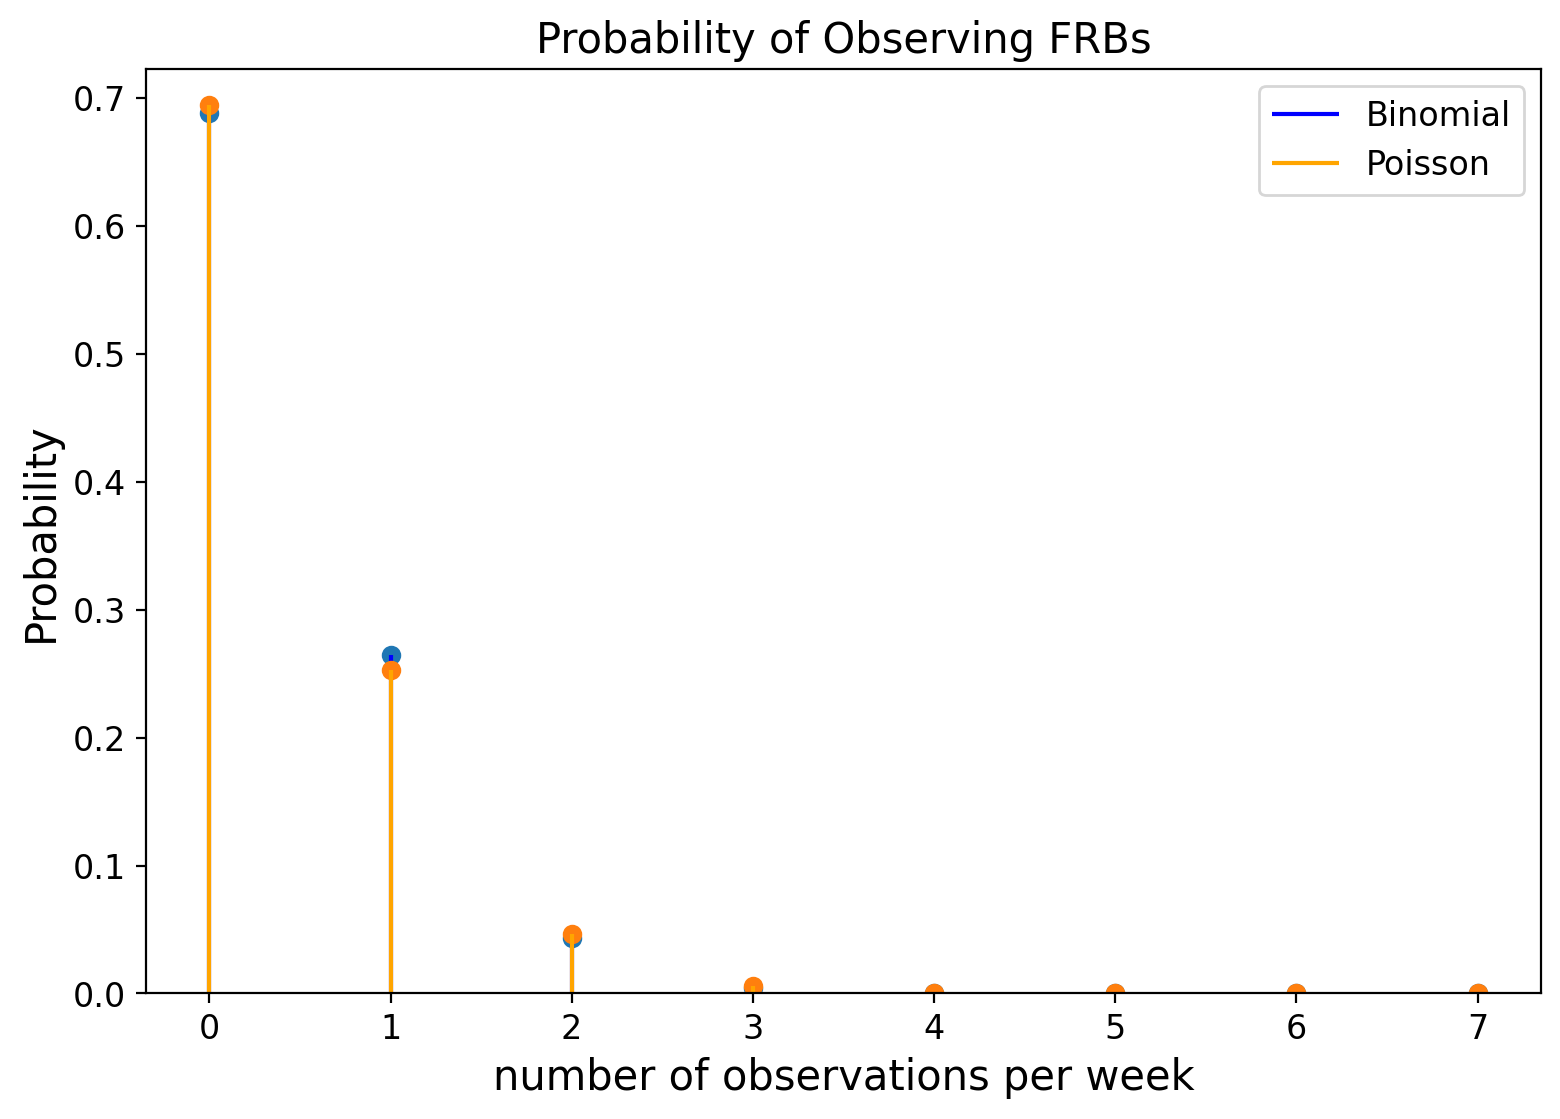

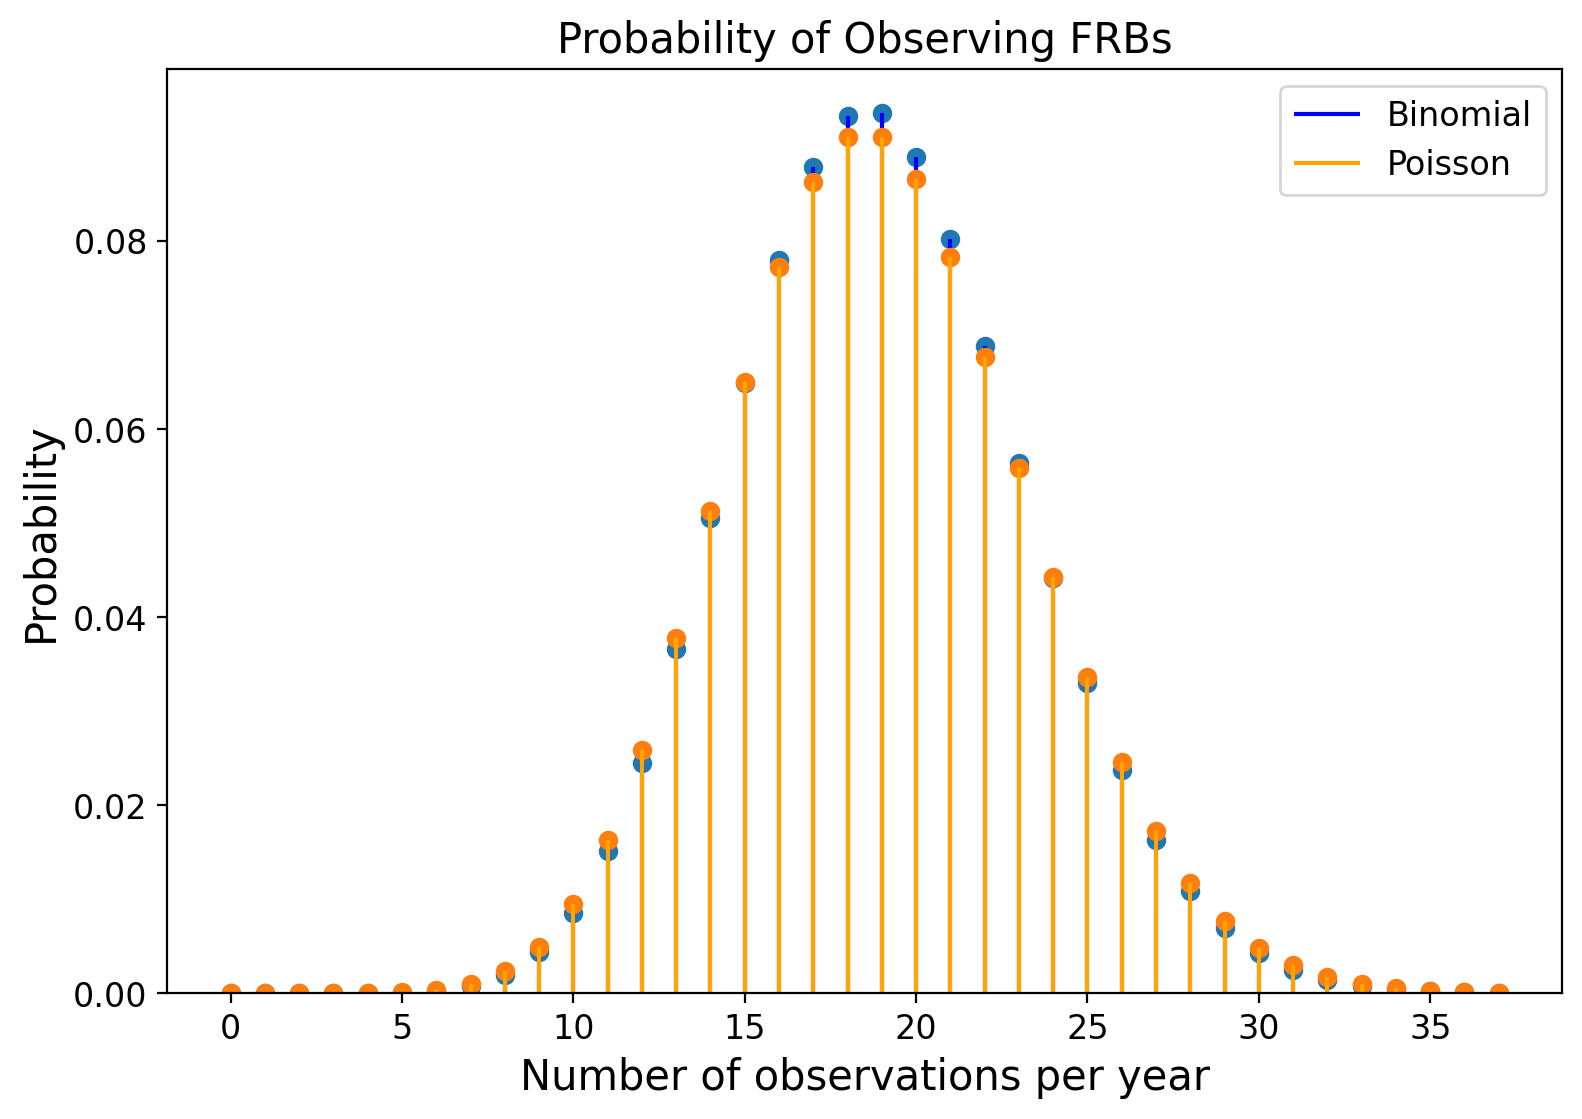

Yearly Binomial mean: 18.999062127754534 stddev: 4.241837723509519
Yearly Poisson mean: 18.99840654567745 stddev: 4.355424414310838



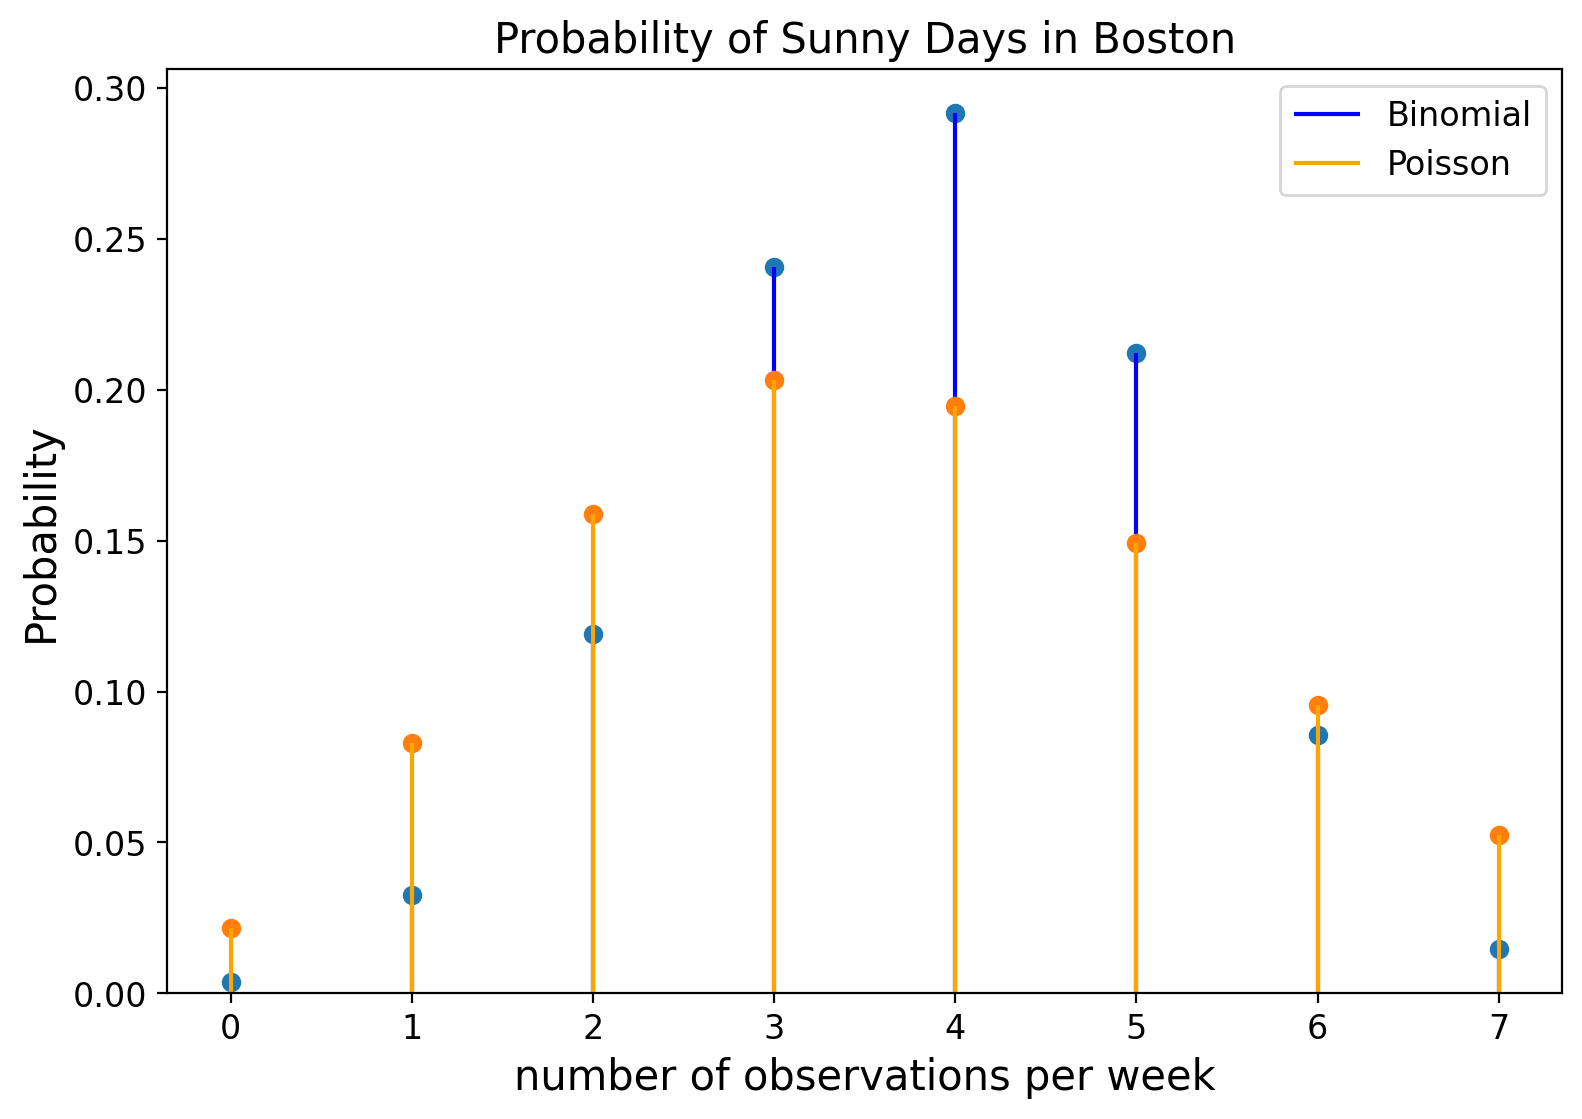

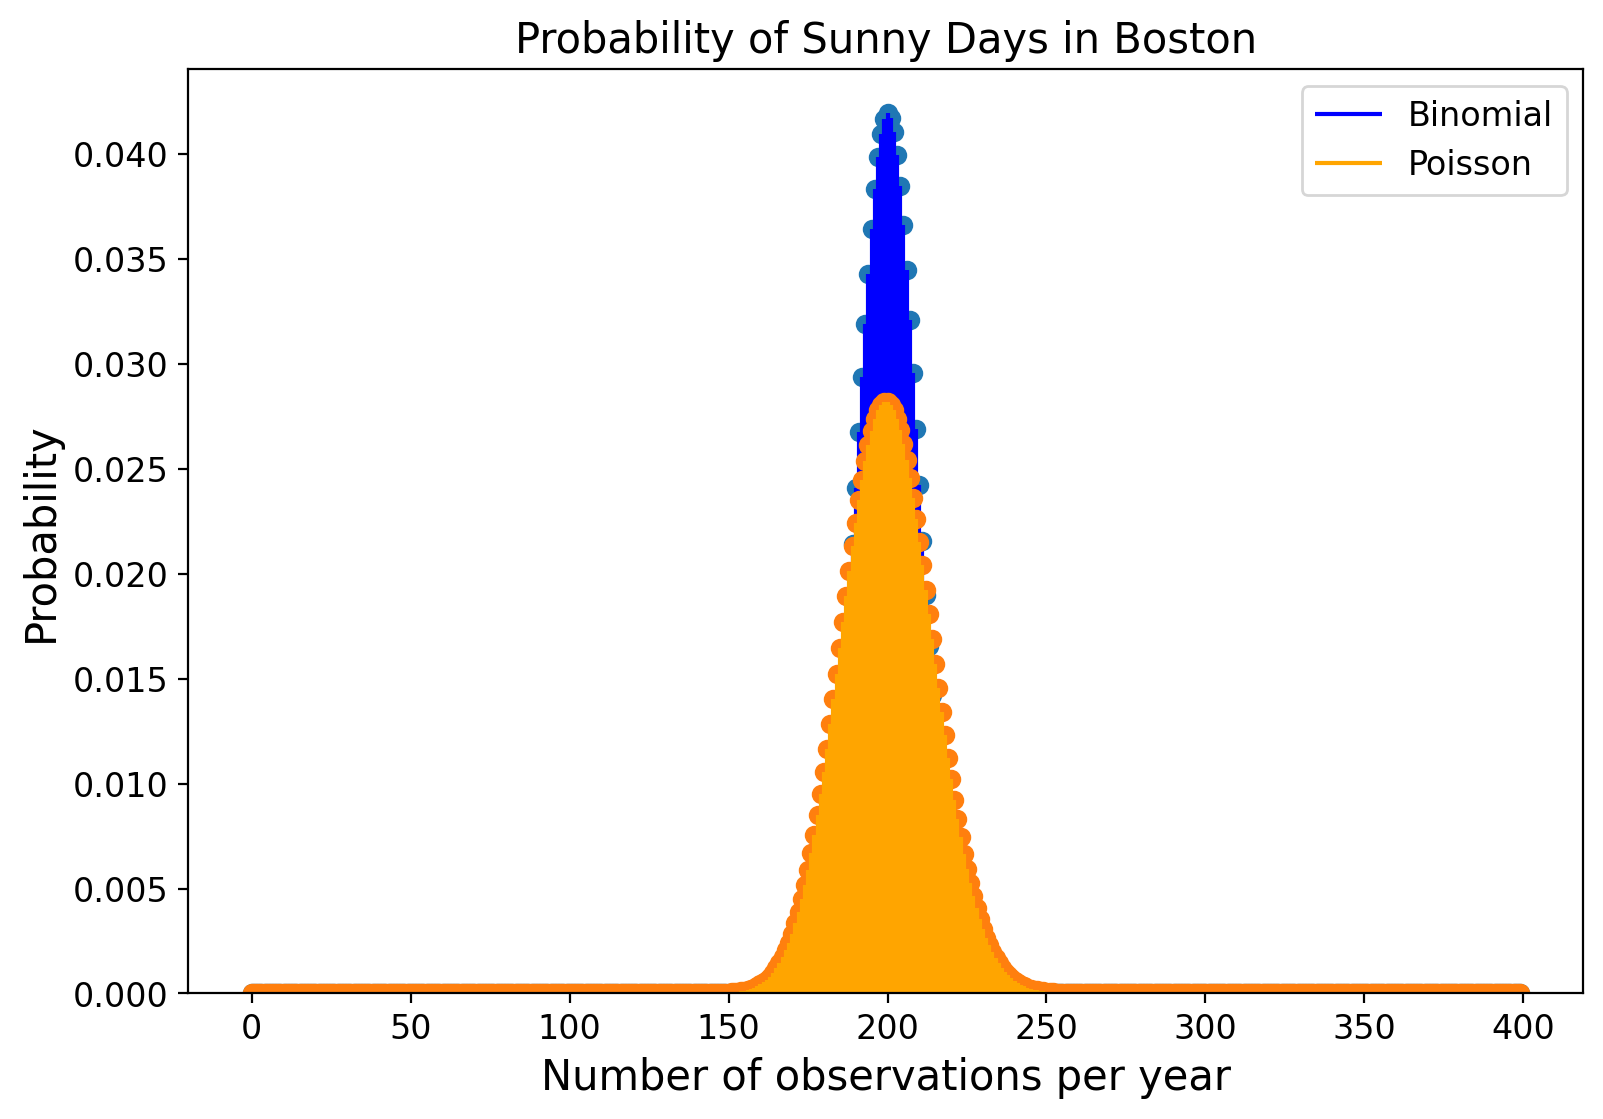

Yearly Binomial mean: 199.99999999999997 stddev: 9.508467747440154
Yearly Poisson mean: 199.9999999999999 stddev: 14.1421356237309



In [ ]:
#>>>RUN: L2.3-runcell01

#Let's make a function for plotting
def plotWeekYear(p, title=''):
    #Week comparison
    n=7
    k=np.arange(0,n+1)
    binomial_week=stats.binom.pmf(k,n,p)
    poisson_week=stats.poisson.pmf(k,n*p)#note we give lambda=n*p
    plt.title(title)
    plotBinomial(k,binomial_week,label='Binomial',color='blue')
    plotBinomial(k,poisson_week,label='Poisson',color='orange')
    plt.legend(loc='upper right')
    plt.xlabel('number of observations per week')
    plt.show()

    n=365
    k=np.arange(0,2*p*n)
    binomial_year=stats.binom.pmf(k,n,p)
    poisson_year=stats.poisson.pmf(k,n*p)#note we give lambda=n*p
    plt.title(title)
    plotBinomial(k,binomial_year,label='Binomial',color='blue')
    plotBinomial(k,poisson_year,label='Poisson',color='orange')
    plt.legend(loc='upper right')
    plt.show()

    average  = np.average(k, weights=binomial_year)
    variance = np.average((k-average)**2, weights=binomial_year)
    print("Yearly Binomial mean:",average,"stddev:",np.sqrt(variance))

    average  = np.average(k, weights=poisson_year)
    variance = np.average((k-average)**2, weights=poisson_year)
    print("Yearly Poisson mean:",average,"stddev:",np.sqrt(variance))
    print()


#First FRBs
p=19/365
plotWeekYear(p, title='Probability of Observing FRBs')

#Now let's do sunny days
p=200/365
plotWeekYear(p, title='Probability of Sunny Days in Boston')


So, we see that the Poisson approximation is really quite good for the case where the $p\ll1$. However, when $p$ is large (like the number of sunny days in the example above) and the number of events is small, the Poisson result can be quite far off. Just look at the number of sunny days per week. The binomial distributions gives about two percent probability of having one sunny day in a week, vs. nearly eight percent probability given by the Poisson distribution. Looking at the number of observations per year, clearly there is also a dramatic difference in the width of the distributions with $p$ is large.

Which one of these distributions is correct for weather? (Answer: Neither are good because the weather from yesterday gives you some information about what will happen today, it's not a random process on a day-to-day level)

<a name='exercises_2_3'></a>     

| [Top](#section_2_0) | [Restart Section](#section_2_3) | [Next Section](#section_2_4) |


### <span style="border:3px; border-style:solid; padding: 0.15em; border-color: #90409C; color: #90409C;">Ex-2.3.1: GW Detection Timescale Comparison</span>

With the current rate of Gravitational wave detections, we observe a GW once per week (one way to phrase this is that the probability of a GW on a given day is 1/7). Compare the Poisson and binomial distributions for the number of days which gravitational waves have been observed over the period of a week vs. a year. **Hint: the previously defined function `plotWeekYear` may be useful.**

Can GW detections be reasonably approximated by a Poisson process?

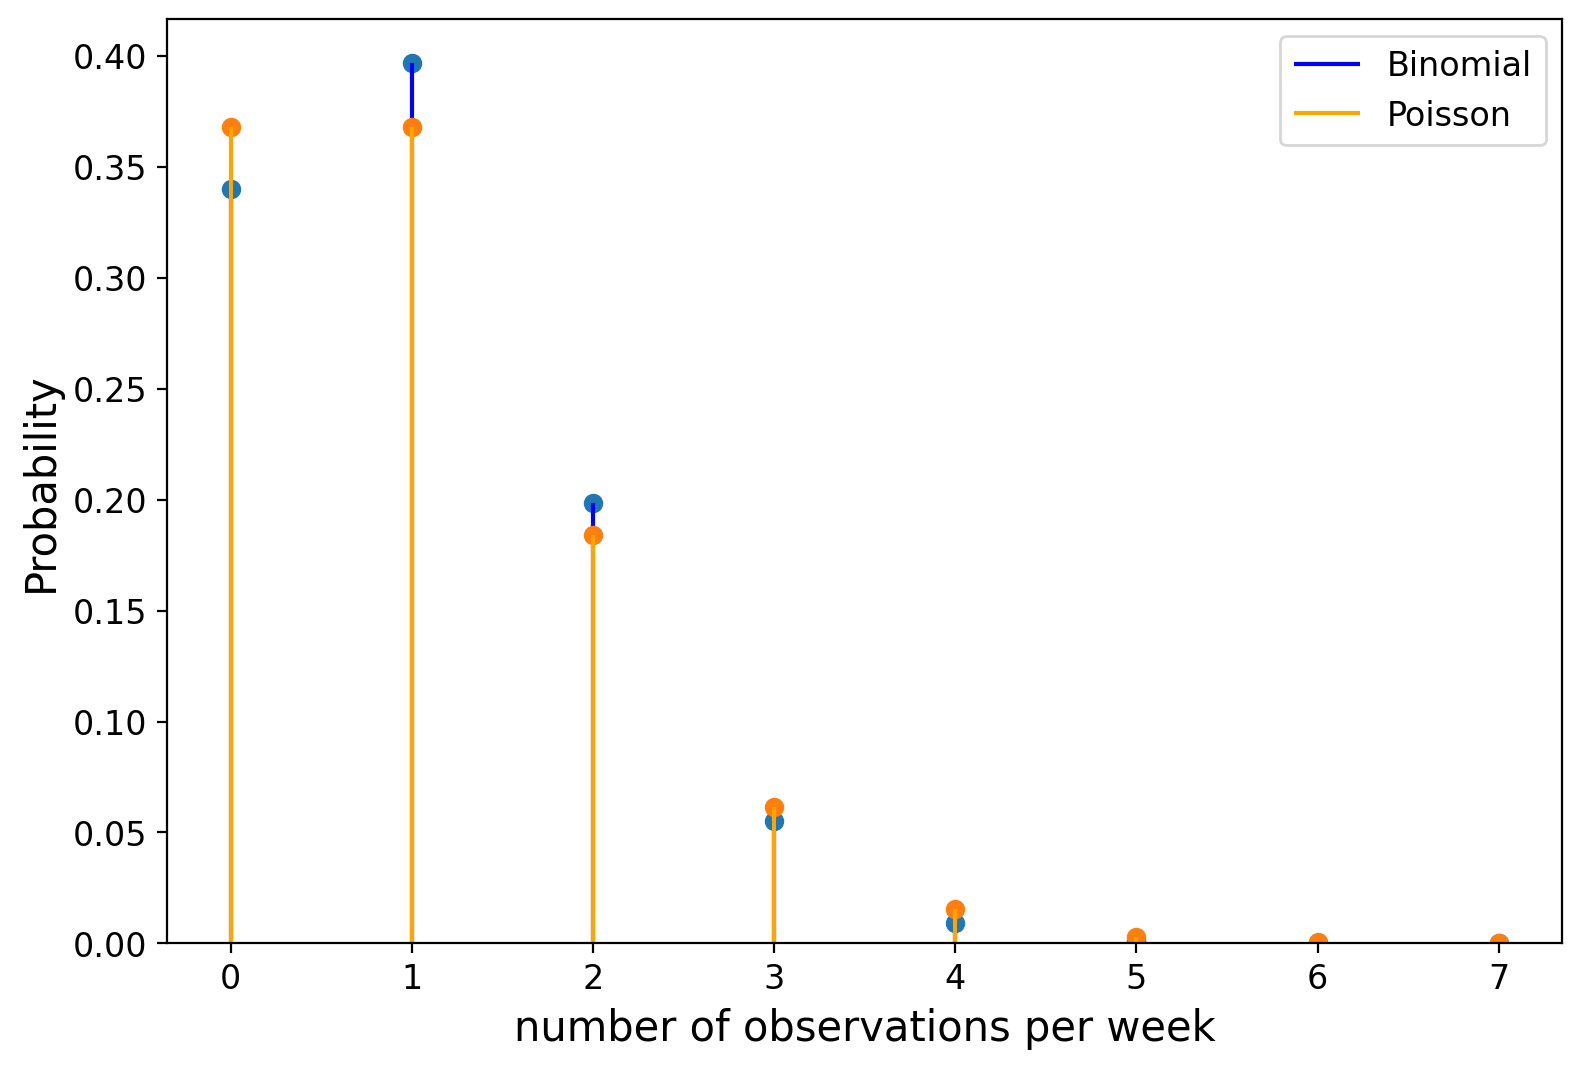

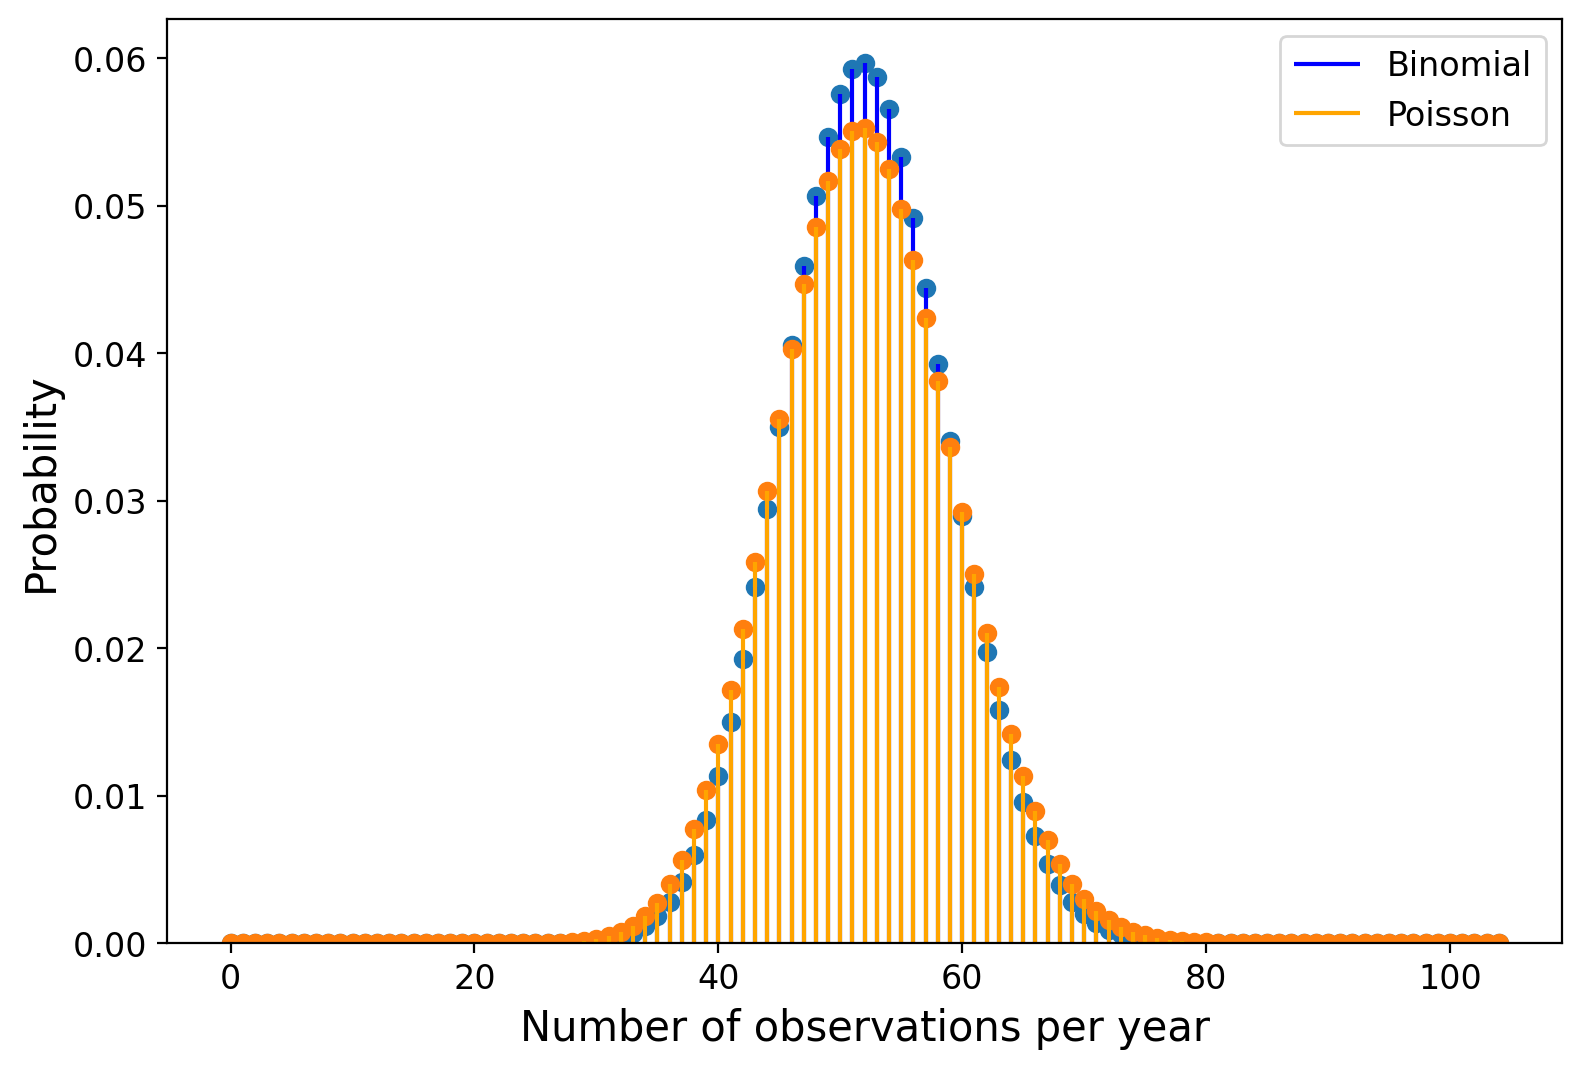

Yearly Binomial mean: 52.14285714281774 stddev: 6.685347975157634
Yearly Poisson mean: 52.14285713841788 stddev: 7.221001101524176



In [ ]:
#>>>EXERCISE: L2.3.1
# Use this cell for drafting your solution (if desired),
# then enter your solution in the interactive problem online to be graded.

plotWeekYear(1/7)

### <span style="border:3px; border-style:solid; padding: 0.15em; border-color: #90409C; color: #90409C;">Ex-2.3.2: Fraction of GWs per Week</span>

If more GWs are detected per week, on average, will a Poisson distribution be a BETTER fit for the distribution of GW observations or a WORSE fit?

Poisson distribution would be better for GW observations since they are events measured on a continuous scale, where binomial distribution cannot perform well. Since this is continuous, n can be adjusted to be a really large number and p becomes much smaller, which are optimal conditions for applying the Poisson distribution

**HOWEVER THE INCREASE IN GWs ALONE INCREASES p AND THUS INCREASES INACCURACY OF POISSON**

<a name='section_2_4'></a>
<hr style="height: 1px;">

## <h2 style="border:1px; border-style:solid; padding: 0.25em; color: #FFFFFF; background-color: #90409C">L2.4 Poisson Distribution Continued</h2>  

| [Top](#section_2_0) | [Previous Section](#section_2_3) | [Exercises](#exercises_2_4) | [Next Section](#section_2_5) |


*The material in this section is discussed in the video **<a href="https://courses.mitxonline.mit.edu/learn/course/course-v1:MITxT+8.S50.1x+3T2024/block-v1:MITxT+8.S50.1x+3T2024+type@sequential+block@seq_LS2/block-v1:MITxT+8.S50.1x+3T2024+type@vertical+block@vert_LS2_vid4" target="_blank">HERE</a>.** You are encouraged to watch that video and use this notebook concurrently.*

<h3>Overview</h3>

Now, why are we spending so much time on Poisson distributions? Let's say I have a distribution that is flat and I sampled that distribution 10000 times, and then made a histogram with 100 bins. Let's make a distribution like that!

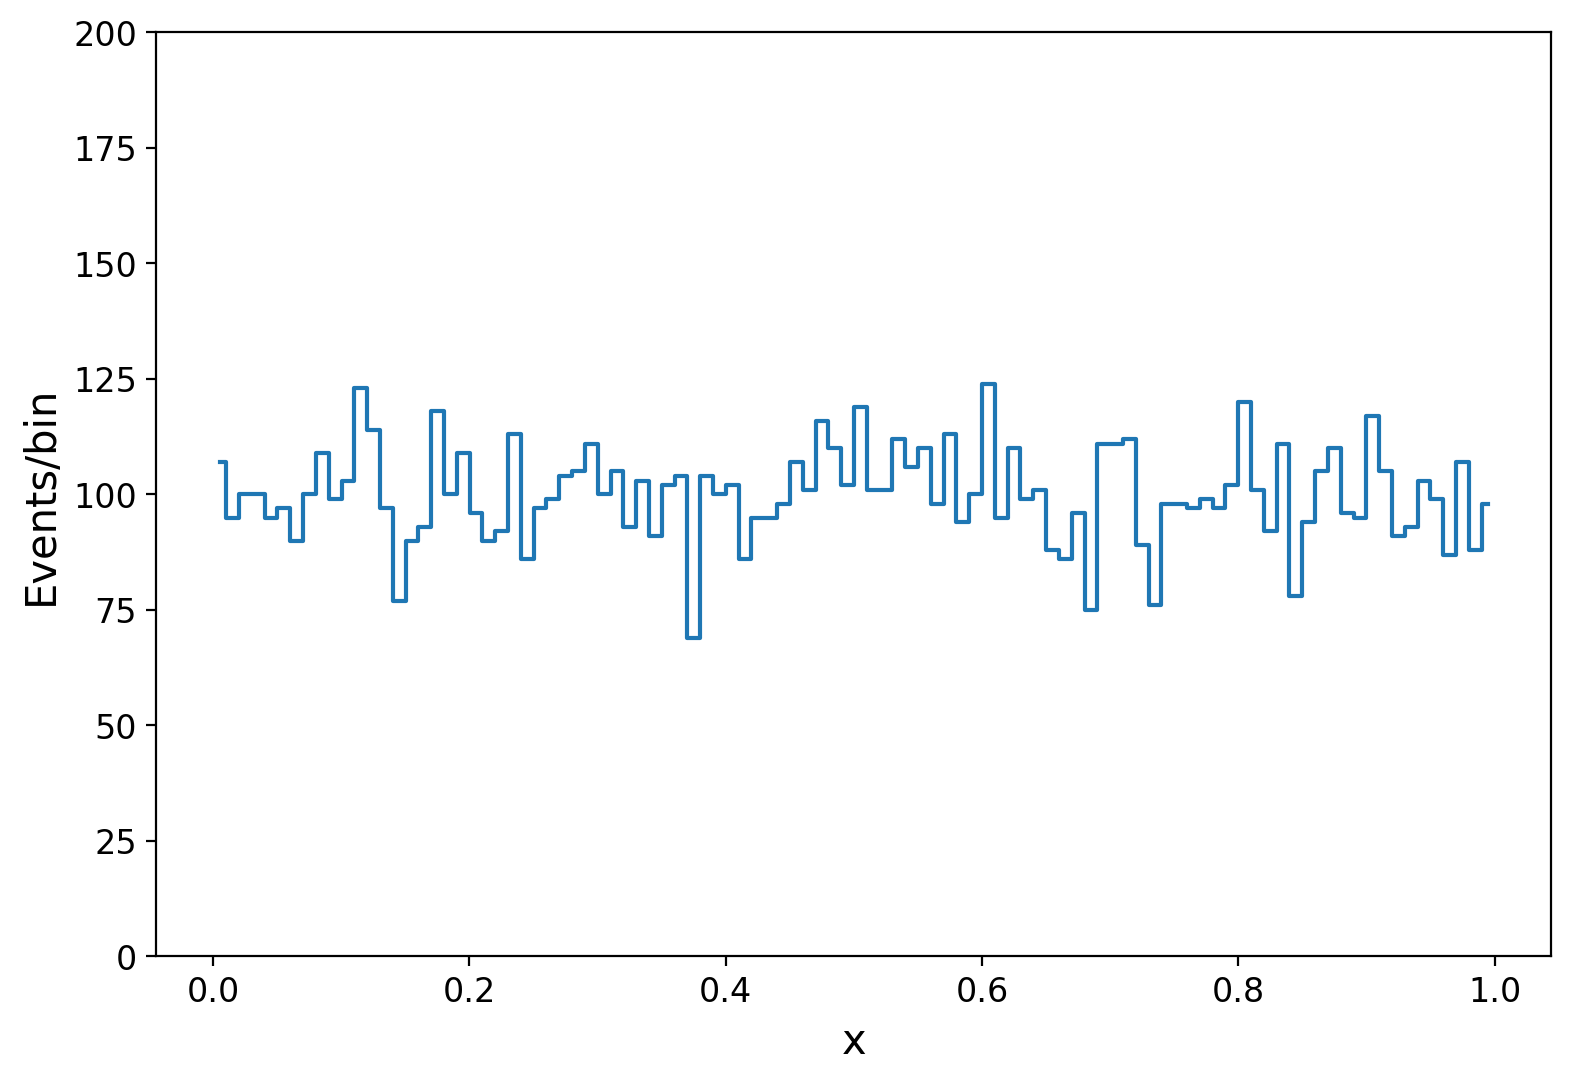

In [ ]:
#>>>RUN: L2.4-runcell01

fig, ax = plt.subplots(figsize=(9,6))
N=10000
nbins=100
sample = np.random.uniform(0,1,N)

def plotHist(iSample,iNBins):
    histy, bin_edges = np.histogram(iSample, bins=iNBins)
    bin_centers = 0.5*(bin_edges[1:] + bin_edges[:-1])
    ax.set_ylim([0,2*N/nbins])
    plt.plot(bin_centers,histy,drawstyle = 'steps-mid')
    plt.xlabel("x")
    plt.ylabel("Events/bin")
    plt.show()
    return bin_centers, histy

_,_ = plotHist(sample,nbins)


Each sampling has a 1/100 probability of being in any one of those bins.

Let's look at the mean and variance over the bins. What is the distribution of the variations over these bins?


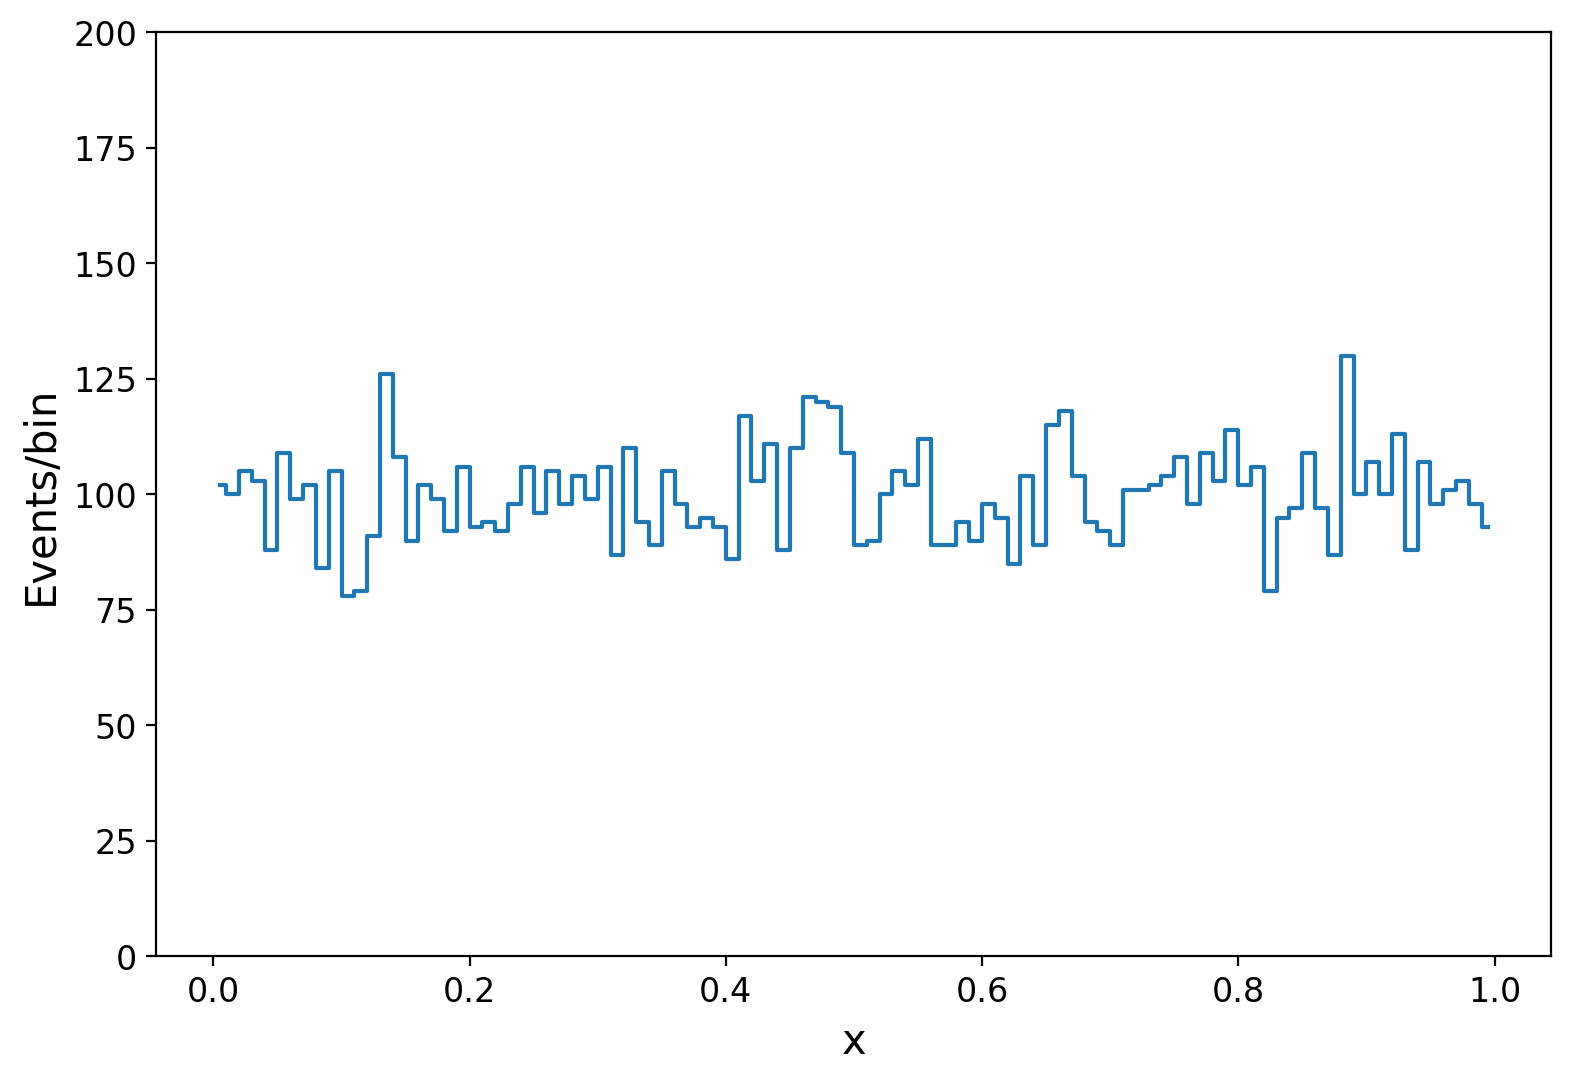

Actual mean: 100.01333333333332 Variance: 99.14666666666668
Poisson mean: 99.99934585710345 Variance: 99.96911275895653


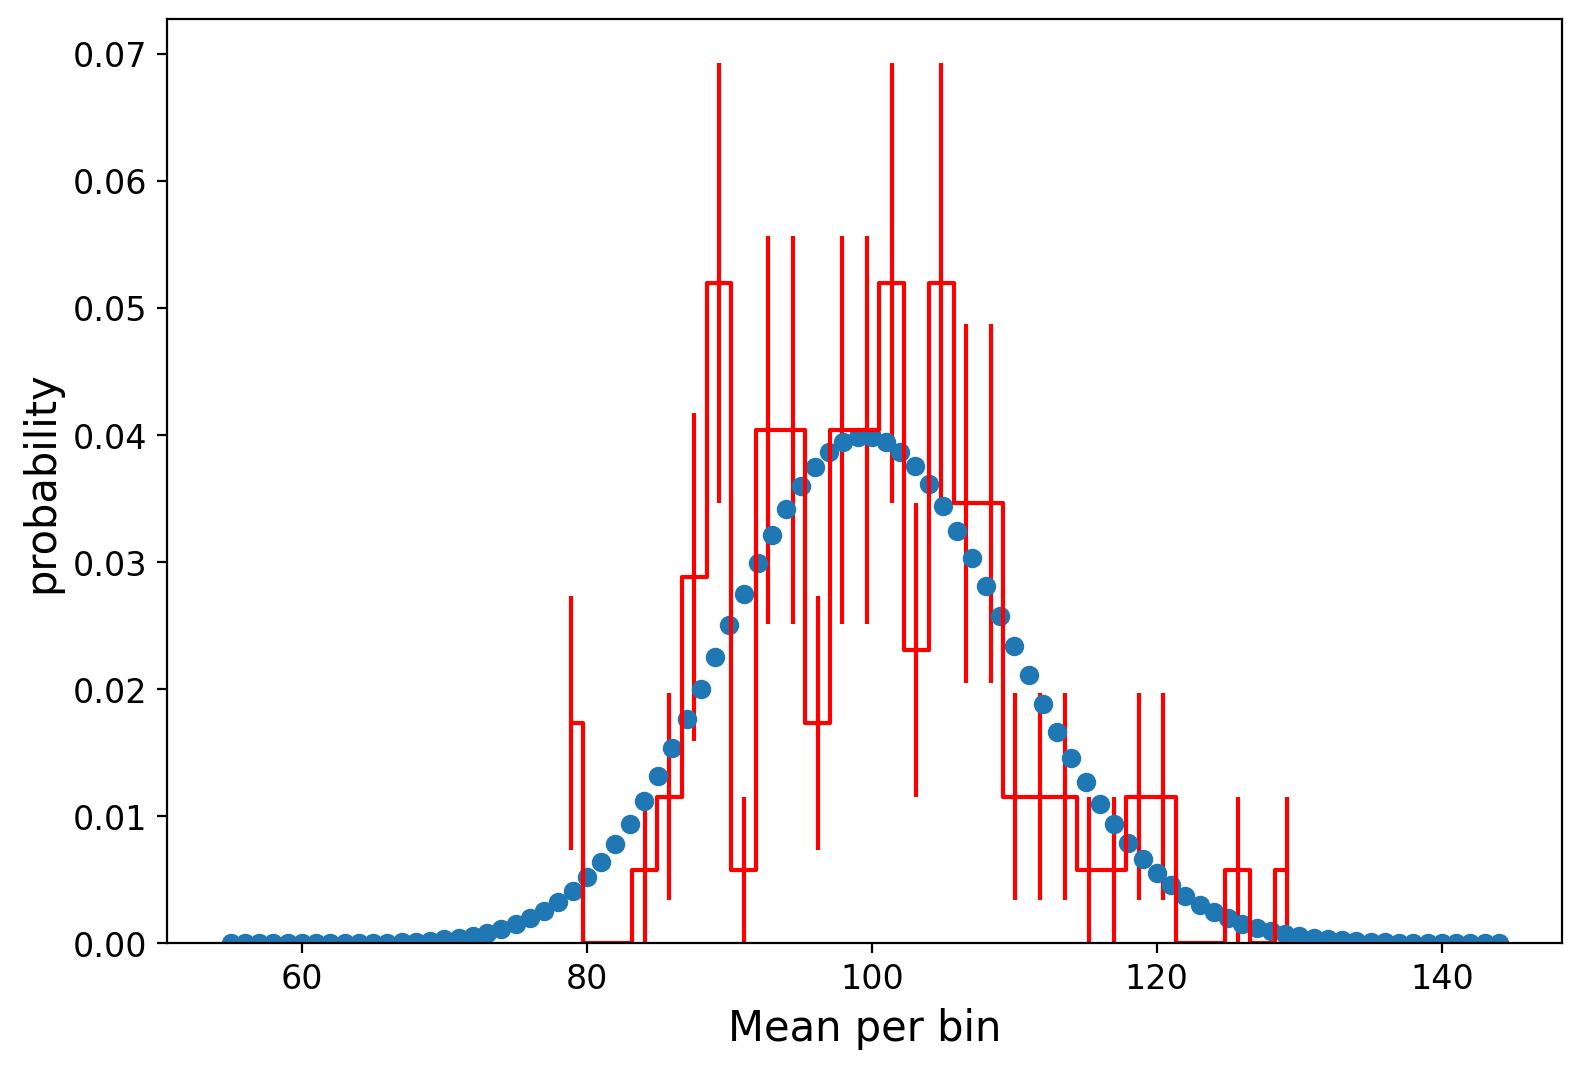

In [ ]:
#>>>RUN: L2.4-runcell02

#copy and past above distribution
fig, ax = plt.subplots(figsize=(9,6))
N=10000
#N=1000000 #Try larger N value
nbins=100
sample  = np.random.uniform (0,1,N)
histx, histy = plotHist(sample,nbins)


def normhist(iVars,iNbins=30,iNormalize=True):
    y0, bin_edges = np.histogram(iVars, bins=iNbins)
    bin_centers = 0.5*(bin_edges[1:] + bin_edges[:-1])
    norm0 = 1
    if iNormalize:
        norm0=len(iVars)*(bin_edges[-1]-bin_edges[0])/iNbins
    plt.errorbar(bin_centers,y0/norm0,yerr=y0**0.5/norm0,drawstyle = 'steps-mid',c='red')
    return bin_centers,y0,bin_edges

residx,residy,_=normhist(histy)
haverage  = np.average(residx, weights=residy)
hvariance = np.average((residx-haverage)**2, weights=residy)
print("Actual mean:",haverage,"Variance:",hvariance)

#Now since we have 100 bins with p=1/100 and we sample 10000 times we have lamb=np= N (1/nbins)
lamb=N/nbins # Number events/bin = 100
k=np.arange(0.55*N/nbins,1.45*N/nbins)
#k=np.arange(0.85*N/nbins,1.15*N/nbins) #adjust range if using larger N
poisson=stats.poisson.pmf(k,lamb)#lambda = n * p = 10000 * (1/100)
paverage  = np.average(k, weights=poisson)
pvariance = np.average((k-paverage)**2, weights=poisson)
print("Poisson mean:",paverage,"Variance:",pvariance)

plt.plot(k,poisson,'o')
# plt.vlines(k,0, poisson)
plt.ylim(bottom=0)

plt.xlabel("Mean per bin")
plt.ylabel("probability")
plt.show()

It's a Poisson distribution! Now, this brings us to a very important plot. If we have a histogram with $N$ events in a particular bin, what are the fluctuations in that bin?


If it is Poisson, then the variance is going to be $N$ and the standard deviation is going to be $\sqrt{N}$. As a consequence, we can characterize the fluctuations per bin by the standard deviation. Thus, whenever we have a plot with data and we want to plot the expected fluctuations per bin, we plot the Poisson fluctuations. The previous distribution would thus look like:

9.989134456677045


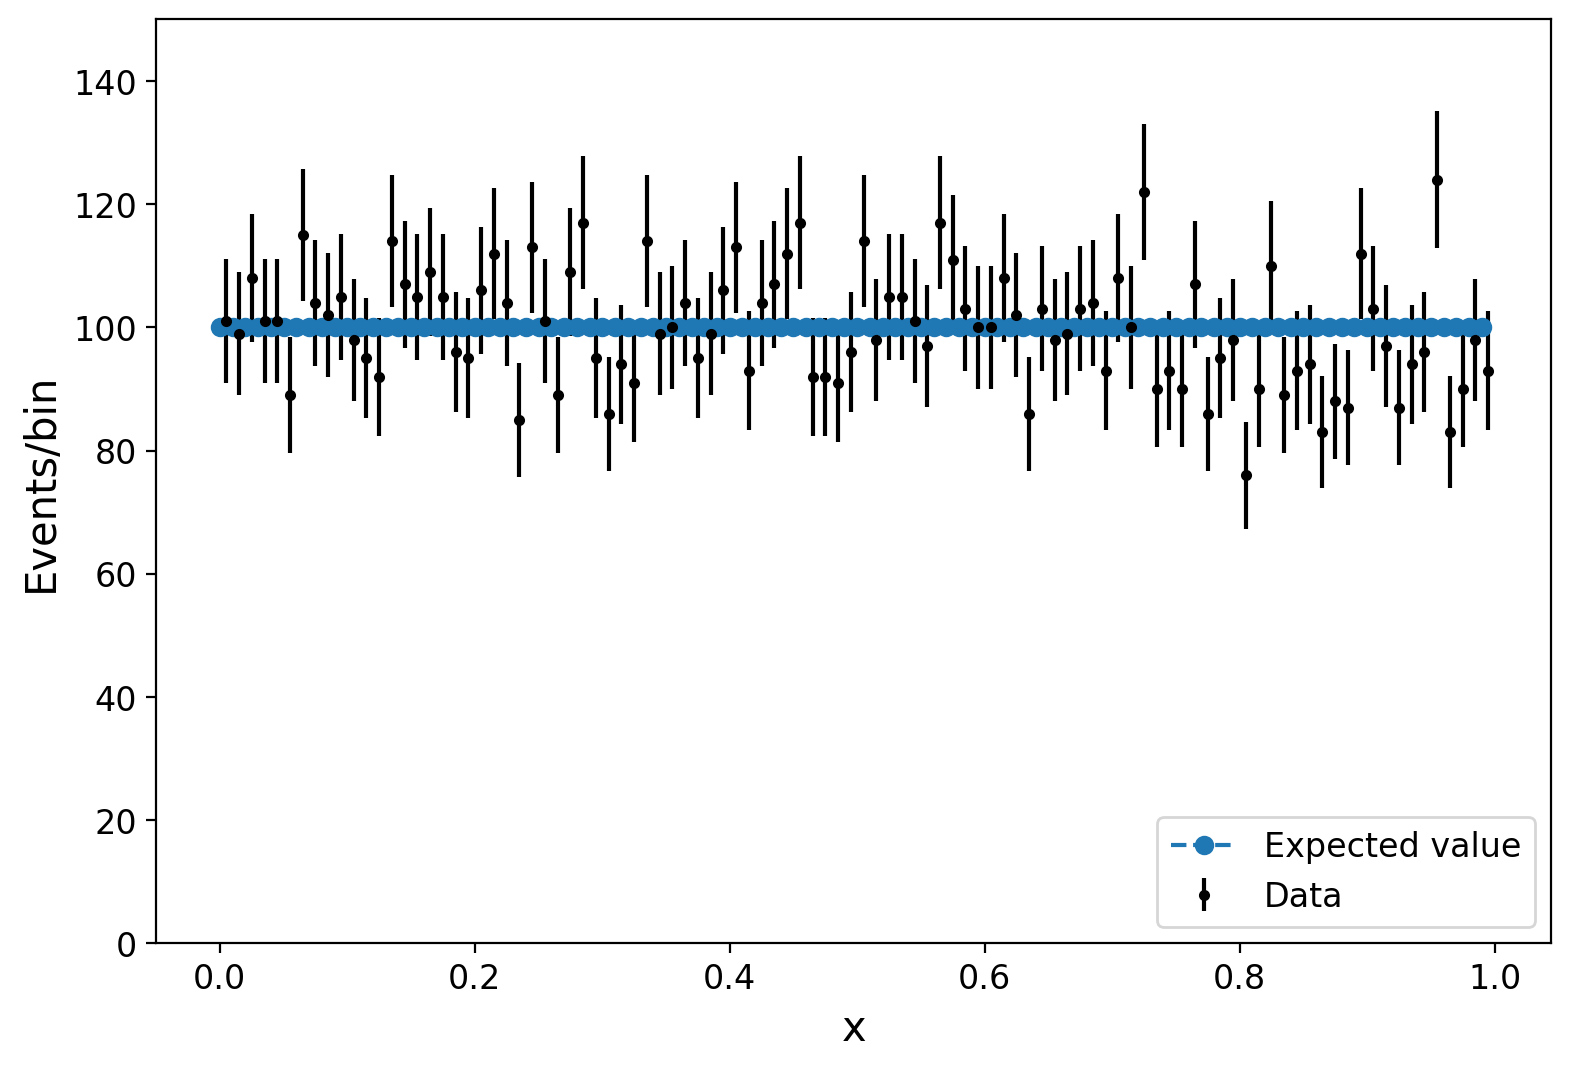

In [ ]:
#>>>RUN: L2.4-runcell03

#And so the bins are Poisson fluctuated. This is why when we plot data in a histogram we put error bars
#Corresponding the Poisson uncertainty in a bin
N=10000
nbins=100
sample  = np.random.uniform (0,1,N)
histy, bin_edges = np.histogram(sample, bins=nbins)
yerr=np.sqrt(histy)
bin_centers = 0.5*(bin_edges[1:] + bin_edges[:-1])
ax.set_ylim([0,2*N/nbins])

#Here is the command
plt.errorbar(bin_centers,histy,yerr=yerr,marker='.',c='black',linestyle = 'None',label='Data')
print(np.mean(yerr))

k=np.arange(0,1,0.01)
vals=np.full((100),N/nbins)
plt.plot(k,vals,'o--',label="Expected value")
plt.ylim(0,150)
plt.xlabel("x")
plt.ylabel("Events/bin")
plt.legend(loc='lower right')
plt.show()

<a name='exercises_2_4'></a>     

| [Top](#section_2_0) | [Restart Section](#section_2_4) | [Next Section](#section_2_5) |


### <span style="border:3px; border-style:solid; padding: 0.15em; border-color: #90409C; color: #90409C;">Ex-2.4.1: Calculating Error for a Poisson Distribution</span>

For 100 bins, what is the Poisson error (standard deviation) averaged over all bins for an experiment run 100, 1000, and 10000 times?

Hint: You can use the code below to help calculate the yerr for all bins and then average them yourself.

Enter your answer as a list of numbers rounded to the nearest integer: `[avg(100), avg(1000), avg(10000)]`.

In [13]:
#>>>EXERCISE: L2.4.1
# Use this cell for drafting your solution (if desired),
# then enter your solution in the interactive problem online to be graded.
import numpy as np
N=100 #YOUR CODE HERE [VARY 100, 1000, 10000]
nbins= 100

sample = np.random.uniform (0,1,N)
histy, bin_edges = np.histogram(sample, bins=nbins)
yerr=np.sqrt(histy)

#YOUR CODE HERE
exp = N/nbins
print(np.sqrt(exp))

print(np.sqrt(sum((histy-exp)*(histy-exp))/N))

1.0
0.938083151964686


<a name='section_2_5'></a>
<hr style="height: 1px;">

## <h2 style="border:1px; border-style:solid; padding: 0.25em; color: #FFFFFF; background-color: #90409C">L2.5 The Gaussian Distribution</h2>  

| [Top](#section_2_0) | [Previous Section](#section_2_4) | [Exercises](#exercises_2_5) | [Next Section](#section_2_6) |


*The material in this section is discussed in the video **<a href="https://courses.mitxonline.mit.edu/learn/course/course-v1:MITxT+8.S50.1x+3T2024/block-v1:MITxT+8.S50.1x+3T2024+type@sequential+block@seq_LS2/block-v1:MITxT+8.S50.1x+3T2024+type@vertical+block@vert_LS2_vid5" target="_blank">HERE</a>.** You are encouraged to watch that video and use this notebook concurrently.*

<h3>Overview</h3>

The Poisson distribution discussed above is very powerful. However, we will often view it as a subset of the Normal or Gaussian distributions, given by the form:


$$
\begin{equation}
\mathcal{N}(x,\mu,\sigma)=\frac{1}{\sqrt{2\pi\sigma^2}} e^{\frac{(x-\mu)^2}{2\sigma^2}}
\end{equation}
$$

This distribution has the very important properties that you can derive yourselves:

$$
\begin{equation}
E[N(x,\mu,\sigma]=\mu \\
V[N(x,\mu,\sigma]=\sigma^2 \\
\end{equation}
$$

It is effectively a Poisson distribution where the variance is now not $\sigma=\lambda$, but instead a free parameter $\sigma$. A Gaussian is often viewed as a generalized version of the Poisson distribution. There are many names for this distribution. Mathematicians and statistician's often call this the Normal distribution. The public frequently refers to this as the bell curve. Physicists call this the Gaussian distribution. These notes will refer to it as Gaussian, since Normal can be confusing (especially with non-native English speakers).


While the Gaussian distribution looks simple, there are several things to notice about it. The most important is that the CDF

$$
\begin{equation}
\mathcal{N}(x,\mu,\sigma)=\int_{x}^{\infty} \frac{1}{\sqrt{2\pi\sigma^2}} e^{\frac{(u-\mu)^2}{2\sigma^2}} du
\end{equation}
$$

does not have a closed analytic form. In fact, we have to integrate this numerically.

What makes the Gaussian distribution so powerful is that it appears all over the place. Let's understand the Gaussian distribution in the context of the most important theorem in all of statistics.


<h3>Central Limit Theorem</h3>

Recall that in Lesson 1 we derived the sum distribution of two objects. This gave us a triangle distribution. What happens when we consider the sum of more than just two numbers, in particular as we approach the sum of a very large set of numbers?


In [ ]:
#>>>RUN: L2.5-runcell01

import math

def plotSum(iN):
    ntoys=10000
    sums=np.array([])
    for i0 in range(ntoys):
        pToy = np.random.uniform(0,10,iN)
        sums = np.append(sums,pToy.sum())
    _,_,binrange=normhist(sums) #plots a Gaussian hist
    k=np.linspace(binrange[0],binrange[-1], 50)
    normal=stats.norm.pdf(k,sums.mean(),sums.std())
    plt.plot(k,normal,'o-')
    plt.xlabel("Number of successes")
    plt.ylabel("Probability")
    print("Summing:",iN," numbers with mean:",sums.mean()," and std-deviation",sums.std(),sums.mean()/math.sqrt(3*iN))
    plt.show()

plotSum(1)
plotSum(2)
plotSum(3)
plotSum(4)
plotSum(50)
plotSum(5000)


So, the sum of a large group of random numbers drawn from a uniform distribution approaches a Gaussian. This is a very important statement. Effectively, this means that any combination of random variables is a Gaussian distribution; this sounds crazy! We will not show the full proof here, but suffice it to say, doing the integrals yields the same observation.


Another interesting thing to note is that the standard deviation of this Gaussian is incidentally given by the (range of uniform distribution)$/\sqrt{12}$. To verify this, for the last experiment with $N = 5000$ draws, we have the following:


In [ ]:
#>>>RUN: L2.5-runcell02

N = 5000
unif_range = 10
print("stddev:", np.sqrt(N * unif_range ** 2 / 12))


This matches the standard deviation we obtain numerically. To see this analytically, let's compute it using the variable substitution $2a'=b-a$.

$$
\begin{eqnarray}
V[x]&=&\int_{a}^{b}\frac{1}{b-a}\left(x-\frac{b-a}{2}\right)^2 dx\\
V[x]&=&\int_{-a^\prime}^{a^\prime}\frac{1}{2a^\prime}\left(x\right)^2 dx\\
V[x]&=&\frac{1}{2a^\prime}\frac{1}{3}\left(x\right)^3|_{-a^\prime}^{a^\prime} \\
V[x]&=&\frac{2a'^3}{2a^\prime}\frac{1}{3} \\
V[x]&=&\frac{\left(\frac{b-a}{2}\right)^2}{3} \\
V[x]&=&\frac{\left(b-a\right)^2}{12} \\
\end{eqnarray}
$$

So, to get the RMS of $N$ random variables summed up, we multiply this variance by $N$. We can further note that the average of $N$ summed variables gives $\bar{x}=\frac{b-a}{2}$. Combining all of this, we have:



$$
\begin{eqnarray}
V[x_1+x_2+...+x_N]&=& N \frac{\left(b-a\right)^2}{12}\\
V[x_1+x_2+...+x_N]&=& N \frac{\bar{x}^2}{3}\\
\end{eqnarray}
$$

This is why we can calculate the standard deviation of our sample using the above formula. In any case, we will take this demo as a proof by demo of what we call **the central limit theorem** which states that **for any distribution composed of inputs from a large number of continuous random variables, the sum tends to a Gaussian**. For fun, outside of class, go ahead and derive it.

<h3>Comparison of Poisson and Gaussian</h3>

Let's compare the Gaussian with a Poisson distribution, so we can connect all of our friends together.

Compare the Poisson distribution to a Gaussian distribution for $\lambda$=3, 15, 100. How do these distributions vary?

In [ ]:
#>>>RUN: L2.5-runcell03

#solution 1
##### Let's plot a Gaussian and Poisson with same mean and RMS
def poisGausPlot(n):
    lamb=n
    k=np.arange(-2,3.0*n)
    poisson=stats.poisson.pmf(k,lamb)
    normal=stats.norm.pdf(k,n,math.sqrt(n))
    plt.plot(k,poisson,'o',label='Poisson')
    plt.vlines(k,0, poisson, color=plt.gca().lines[-1].get_color())
    plt.ylim(bottom=0)
    plt.plot(k,normal,'-',label='Gaussian')
    plt.xlabel("Number of successes")
    plt.ylabel("Probability")
    plt.legend(loc='lower right')
    plt.show()

poisGausPlot(3)
poisGausPlot(15)
poisGausPlot(100)


<a name='exercises_2_5'></a>     

| [Top](#section_2_0) | [Restart Section](#section_2_5) | [Next Section](#section_2_6) |


### <span style="border:3px; border-style:solid; padding: 0.15em; border-color: #90409C; color: #90409C;">Ex-2.5.1: Sum of Two Gaussians</span>

Show that the sum of two Gaussian distributions is also Gaussian. To do this, plot the normalized histogram of the sum of two numbers drawn from identical Gaussian distributions. In the same figure, plot a Gaussian distribution with mean and standard deviation equal to the mean and standard deviation of the summed distribution. Write your own code, or run the code below.


Based on the output of your code, how is the standard deviation of the summed distribution, $\sigma_{\mathrm{sum}}$, related to the standard deviation of the Gaussian distributions from which the samples are drawn (call this $\sigma_0$)? Choose from the options below.

- $\sigma_{\mathrm{sum}} = 2\sigma_0$
- $\sigma_{\mathrm{sum}} = \sqrt{2}\sigma_0$
- $\sigma_{\mathrm{sum}} = \sigma_0$
- $\sigma_{\mathrm{sum}} = \sigma_0/\sqrt{2}$
- $\sigma_{\mathrm{sum}} = \sigma_0/2$


How would this relation change if you summed more samples (here we just did 2, 100000 times). Try varying $\sigma$ and the number of samples chosen (where are these defined in the code)?

In [ ]:
#>>>EXERCISE: L2.5.1
# Use this cell for drafting your solution (if desired),
# then enter your solution in the interactive problem online to be graded.

#Generate 2 Gaussian and sum
ntoys=100000
istdev=1
sums=np.array([])
for i0 in range(ntoys):
    pToy = np.random.normal(0,istdev,2)
    sums = np.append(sums,pToy.sum())
_,_,binrange=normhist(sums)

k=np.arange(binrange[0],binrange[-1])
normal=stats.norm.pdf(k,sums.mean(),sums.std())

plt.plot(k,normal,'o-')
plt.xlabel("Number of successes")
plt.ylabel("Probability")
print("Summing: 2, numbers with mean:",sums.mean()," and std-deviation",sums.std())
plt.show()

>#### Follow-up 2.5.1a (ungraded)
>  
>We've compared the Poisson and binomial distributions, and Poisson and Gaussian distribution. Now try comparing the binomial and Gaussian distributions. What similarities and differences do they have?

<a name='section_2_6'></a>
<hr style="height: 1px;">

## <h2 style="border:1px; border-style:solid; padding: 0.25em; color: #FFFFFF; background-color: #90409C">L2.6 Uncertainties in Measurement</h2>  

| [Top](#section_2_0) | [Previous Section](#section_2_5) | [Exercises](#exercises_2_6) | [Next Section](#section_2_7) |


*The material in this section is discussed in the video **<a href="https://courses.mitxonline.mit.edu/learn/course/course-v1:MITxT+8.S50.1x+3T2024/block-v1:MITxT+8.S50.1x+3T2024+type@sequential+block@seq_LS2/block-v1:MITxT+8.S50.1x+3T2024+type@vertical+block@vert_LS2_vid6" target="_blank">HERE</a>.** You are encouraged to watch that video and use this notebook concurrently.*

<h3>Slides</h3>

Run the code below to view the slides for this lesson, which are discussed in the videos. You can also open the slides in a separate window <a href="https://mitx-8s50.github.io/slides/L02/slides2.html" target="_blank">HERE</a>.

In [ ]:
#>>>RUN: L2.6-slides

from IPython.display import IFrame
IFrame(src='https://mitx-8s50.github.io/slides/L02/slides2.html', width=975, height=550)

<h3>Overview</h3>

In the previous Lesson, we explained that the expectation is the mean of a distribution and the variance is a measure of the width. When we perform a measurement, we are just sampling from an unknown distribution, or worse yet, we are sampling from an unknown distribution and then distorting that distribution with some sort of effect.

Let's say that you are sampling a distribution that is fundamentally a Gaussian. Now on top of this, we then distort this distribution by a function $f(x)$. This distortion will modify the distribution of the events, making it less Gaussian, or shrinking and stretching it. A distortion function can arise from many aspects of the measurement, such as from sending a particle through a magnetic field, or having light reflect off a mirror. There are countless examples of such distortive effects in physical measurements. If we happen to know $f(x)$ as well as the distribution of $x$, how does the shape of $x$ get distorted by $f(x)$?

To answer this question, consider the case where the probability of the input distribution is $p(x)$. If we define $x^{\prime}=f(x)$,  the probability to be in a small region $dx^\prime$ of the modified coordinates is defined by
$x^{\prime}=f(x)$,  the probability to be in small region $dx^\prime$ of the modified coordinates is defined by

$$
\begin{eqnarray}
p^{\prime}(x^\prime)dx^\prime&=&f(p(x))dx^\prime \\
                             &=&f(p(x))\frac{dx^\prime}{dx}dx\\
                             &=&f(p(x))\frac{df}{dx}dx\\
\end{eqnarray}
$$

This follows from the fact that the spread of a function sampled from $p(x)$ would be modified by the spread of $f(x)$ defined as  $f(x+\Delta x)-f(x)\approx\frac{df}{dx}\Delta x$.

As a simple example, in the case of $f(x)=x^{2}$ or $\frac{df}{dx}=2x$. What that means is that $\sigma_{f(x)}\approx2x\sigma_{x}$. Let's actually see that empirically.


In [ ]:
#>>>RUN: L2.6-runcell01

#Now let's say we do a measurement, and the measurement takes an input variable that is varying,
#and applies a function to it. What is the spread of the function
ntries=1000
meas = np.full(ntries,100) #The value 100, 1k times
unc  = np.random.normal (0,1, ntries) #a randomly sampled value from a Gaussian with width 1 1k times
meas = meas+unc # the value 100 now smeared with sigma=1

def function(ix):#our function
    return ix**2
outmeas = function(meas)
_,_,_=normhist(outmeas)

print("Mean:",outmeas.mean(),"Stddeviation:",outmeas.std())
print("Predicted Mean:",function(100),"Stddeviation:",2*100) #expect it to be 2*100*1


Now, what about if we have two sources of uncertainty? This is a little bit different in the sense that these variations are independent of each other. Let's consider the very simple function $f(x)=x$. Now, let's say that $x$ can vary by a Gaussian distributed variable $\sigma_1$ and a second Gaussian distributed variable $\sigma_2$. If we consider these variations, we have that $f(x)$ will be modified by


$$
\begin{equation}
 f(x) = x + \sigma_1 + \sigma_2
\end{equation}
$$

This will give us two Gaussians. If we look to see the variance of this distribution, we can treat these two fluctuations as two independent measurements, which means we can write.

$$
\begin{eqnarray}
 V[f(x)] &=& V(x) + V(\sigma_1) + V(\sigma_2)\\
                &=& \sigma_1^2 + \sigma_2^2
\end{eqnarray}
$$

To visualize what is going on, we can imagine plotting these variations in a 2D plot.



In [ ]:
#>>>RUN: L2.6-runcell02

ntoys=10000
err1=np.array([])
err2=np.array([])
for i0 in range(ntoys):
    pToy = np.random.normal(0,1,2)
    err1 = np.append(pToy[0],err1)
    err2 = np.append(pToy[1],err2)
angle = np.linspace( 0 , 2 * np.pi , 150 )
#correct circle
radius = 1*np.sqrt(2)
x = radius * np.cos( angle )
y = radius * np.sin( angle )
#too large circle
radius = 1*2.0
x2 = radius * np.cos( angle )
y2 = radius * np.sin( angle )

plt.rcParams['figure.figsize'] = (6,6)
plt.plot(err1,err2,"p")
plt.plot(x,y,c='r')
plt.plot(x2,y2,c='r')
plt.xlabel("$\sigma_{1}$")
plt.ylabel("$\sigma_{2}$")
plt.show()
plt.rcParams['figure.figsize'] = (9,6)

Sampling two Gaussians gives us a circular distribution with a width given by the radius of the circle. This radius can be seen to be the standard deviation of $f(x)$ or the $\sqrt{V[f(x)]}=\sqrt{\sigma_1^2+\sigma_2^2}$. In other words, when sampling two independent variables, the variations add as their squares, as if they are two separate independent coordinates. This is often denoted as a "Sum in Quadrature."

<a name='exercises_2_6'></a>     

| [Top](#section_2_0) | [Restart Section](#section_2_6) | [Next Section](#section_2_7) |


### <span style="border:3px; border-style:solid; padding: 0.15em; border-color: #90409C; color: #90409C;">Ex-2.6.1: Uncertainty in $f(x)$</span>

If $f(x) = \log(x)$, what is $\sigma_{f(x)}$ in terms of $x$ and $\sigma_{x}$? Express your answer in terms of `x` and `sigma_x` for $\sigma$.


>#### Follow-up 2.6.1a (ungraded)
>  
>Try computing this numerically and comparing to your analytic solution.


In [ ]:
#>>>EXERCISE: L2.6.1a
# Use this cell for drafting your solution (if desired),
# then enter your solution in the interactive problem online to be graded.

ntries=100000
mean=100
sigma=5
meas = np.full(ntries,mean) #The value 100, 1k times
unc  = np.random.normal (0,sigma, ntries) #a randomly sampled value from a Gaussian with width 1 1k times
meas = meas+unc # the value 100 now smeared with sigma=1

def function(ix):#our function
    return np.log(ix)

outmeas = function(meas)
_,_,_=normhist(outmeas)

analytic_stdev = 0. #YOUR CODE HERE

print("Mean:",outmeas.mean(),"Stddeviation:",outmeas.std())
print("Predicted Mean:",function(mean),"Stddeviation:",analytic_stdev)


<a name='section_2_7'></a>
<hr style="height: 1px;">

## <h2 style="border:1px; border-style:solid; padding: 0.25em; color: #FFFFFF; background-color: #90409C">L2.7 Propagating Uncertainties</h2>     

| [Top](#section_2_0) | [Previous Section](#section_2_6) | [Exercises](#exercises_2_7) |


*The material in this section is discussed in the video **<a href="https://courses.mitxonline.mit.edu/learn/course/course-v1:MITxT+8.S50.1x+3T2024/block-v1:MITxT+8.S50.1x+3T2024+type@sequential+block@seq_LS2/block-v1:MITxT+8.S50.1x+3T2024+type@vertical+block@vert_LS2_vid7" target="_blank">HERE</a>.** You are encouraged to watch that video and use this notebook concurrently.*

<h3>A realistic example</h3>

Very famously, there was an excess of events found at a certain point in a distribution measured by an experiment at the Tevatron collider in Fermilab. This excess caused a lot of excitement. However many people were skeptical. <a href="https://www.science20.com/quantum_diaries_survivor/no_jetjet_bump_new_cdf_diboson_analysis-123327" target="_blank">HERE</a> is a full description of what was going on. In brief, the two plots shown below summarize the evidence that people thought showed a bump indicating the existence of a new particle:

<img alt="Fig 2.7.1: excess of events at the Tevatron collider" src="http://www.pd.infn.it/~dorigo/wjjcdf73fb.jpg" width="700"/>

>source:  https://arxiv.org/pdf/1104.0699.pdf<br>
>attribution: CDF Collaboration, arXiv:1104.0699v2

The plots show the number of events as a function of the so-called "invariant mass" of a pairs of jets. The term "jets" refers to a cluster of particles all emitted in very close to the same direction. When two such jets are observed, one can calculate the mass of a hypothetical very short lifetime particle which could have decayed to produce the two observed jets. This mass needs to be corrected for relativistic effects to determine its value when that particle was at rest, hence the term "invariant mass".

In both plots, the black points represent a histogram of the data. The filled in areas in the left plot are a histogram summing up the simulations of all the other physics processes that we know are occurring. The different fill colors represent each individual prediction. Finally, on the right, we subtract the solid distribution from the data. However, notice that the "WW+WZ" process shown in red in the left plot has not been subtracted. That contribution is shown as the red histogram in the right plot. The blue histogram on the right plot is a Gaussian fit to what appears to be a deviation in the data compared to the sum of all expected physics processes.

The fact that this deviation corresponds to a bump makes us think this is a new particle. The problem with this bump is that it's a bump on top of a steeply falling distribution. You need to look very closely at the left plot to see this same blue "bump" contribution. So, what would happen to this comparison if our predicted distribution was shifted to the right by a little bit. What would the effect be on the appearance of the bump?

To see this, let's open a file with this data and try to shift it ourselves. Note that the following code subtracts *all* of the expected physics processes so that the second plot below does not show the red bump seen in the right plot above.

In [ ]:
#>>>RUN: L2.7-runcell01

import csv
import matplotlib.pyplot as plt
import numpy as np
import urllib.request

#load the file
def load(iName):
    label=iName
    datax=np.array([])
    datay=np.array([])
    datayerr=np.array([])
    with open(label,'r') as csvfile:
        plots = csv.reader(csvfile, delimiter=',')
        for row in plots:
            datax    = np.append(datax,float(row[0]))
            datay    = np.append(datay,float(row[1]))
            datayerr = np.append(datayerr,np.sqrt(float(row[1])))
    return datax,datay,datayerr

#compute the ratio between data and simulation
def histratio(iydata,iyderr,iysim):
    newydata=np.array([])
    newyderr=np.array([])
    for i0 in range(len(iysim)):
        ynew=iydata[i0]/iysim[i0]
        yner=iyderr[i0]/iysim[i0]
        newydata=np.append(newydata,ynew)
        newyderr=np.append(newyderr,yner)
    return newydata,newyderr

fig = plt.figure(figsize=(10.5, 9.5))
ax = fig.add_subplot(2,1,1)
datax,datay,datayerr=load("data/L02/tmpdata.txt")
simx,simy,simyerr=load("data/L02/tmpmc.txt")
plt.errorbar(datax,datay,yerr=datayerr,marker='.',c='black',linestyle = 'None')
plt.plot    (datax,simy,drawstyle = 'steps-mid')
ax = fig.add_subplot(2,1,2)
yrdata,yrderr=histratio(datay,datayerr,simy)
ax.errorbar(datax,yrdata,yerr=yrderr,marker='.',c='black',linestyle = 'None')
ax.axhline(1, c='red')
ax.set_ylim(0.5,1.5)
plt.xlabel("Mjj [GeV]")
plt.ylabel("Data/Simulation")
plt.show()


We can define a shift in a histogram by just shuffling events in bins. This we do by


$$
\begin{align}
f(x^{\prime}) & =f(x+\sigma)\approx f(x)+\frac{df}{dx}\sigma\\
 & =f(x)+\frac{f(x+\Delta x)-f(x)}{\Delta x}\sigma\\
 & =f(x)\left(1-\frac{\sigma}{\Delta x}\right)+f(x+\Delta x)\frac{\sigma}{\Delta x}
\end{align}
$$

which we can rewrite in terms of bin shifts with a fractional uncertainty of $\textrm{f}=\frac{\sigma}{\Delta x}$. This gives us


$$
\begin{equation}
\rm{bin_{i}} = (1-f)\rm{bin}_{i} + (f) \rm{bin}_{i-1} \\
f(x_{i}) = f(x_{i})(1-f)+f(x-\Delta x)f
\end{equation}
$$

Such a shift could occur if there was an additional uncertainty in the invariant mass which had not been accounted for. Let's add this modification and see if a fractional shift can explain our deviation.

In [ ]:
#>>>RUN: L2.7-runcell02

#Now let's shift the bins of the simulation by a fraction
def shifthist(ixunc,isimy):
    newsimy=np.array([])
    for i0 in range(len(isimy)):
        ynew = isimy[i0]*(1-ixunc)
        if i0 > 1:
            ynew = isimy[i0-1]*ixunc + isimy[i0]*(1-ixunc)
        newsimy=np.append(newsimy,ynew)
    return newsimy


fig = plt.figure(figsize=(10.5, 9.5))
ax = fig.add_subplot(2,1,1)
newsimy=shifthist(0.5,simy)
plt.errorbar(datax,datay,yerr=datayerr,marker='.',c='black',linestyle = 'None')
plt.plot    (datax,simy,drawstyle = 'steps-mid')
plt.plot    (datax,newsimy,drawstyle = 'steps-mid')

ax = fig.add_subplot(2,1,2)
yrdata,yrderr=histratio(datay,datayerr,newsimy)
ax.errorbar(datax,yrdata,yerr=yrderr,marker='.',c='black',linestyle = 'None')
ax.axhline(1, c='red')
ax.set_ylim(0.5,1.5)
plt.xlabel("Mjj [GeV]")
plt.ylabel("Data/Simulation")
plt.show()


We can see that a fractional shift of merely half the bin size is sufficient to explain this effect. Do you believe that the bump is real?

As an aside, think about how unintuitive it is that simply shifting the prediction slightly in the horizontal axis results in what looks like a very clear peak when comparing to the data. This is a good example of how subtle effects can often produce what looks otherwise like a very obvious discovery.

If you are a big proponent of the existence of a peak, you could still see some evidence for a small excess in the data around 150. However, given that the vertical bars represent the independent statistical uncertainties, think about the probability that a few points will together deviate upward simply by chance.

<a name='exercises_2_7'></a>   

| [Top](#section_2_0) | [Restart Section](#section_2_7) |


>#### Follow-up 2.7.1a (ungraded)
>    
>Examine the CDF data further. Try other fractional shifts. Does the resulting fit look better or worse (look at the residuals)?
